In [764]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy import stats
import pingouin as pg
from bioinfokit.analys import stat


nbUsers = 20
startNbUser = 1


allCountdowns = pd.DataFrame()
nameList = []

for i in range(startNbUser, startNbUser + nbUsers):
    nameList.append("User"+str(i))

nameList.remove('User2')
nameList.remove('User12')




conditions = ['Hand', '3DMouse']
userExperiences = ['Selection', 'Docking', 'PathTracing']


measures = ['Countdown']
measurePos = ['Positions']

configSize = ['medium', 'large', 'small']
configDirection = ['X', 'Y', 'Z', 'XY', 'XZ', 'YZ', 'XYZ']

measureCircuit = []
for i in range(0, 5):
    measureCircuit.append("Circuit"+str(i))

for i in range(0, len(nameList)):
    for k in range(0, len(conditions)):
        resultsCountdown = None
        
        for j in range(0, 2):    
            resultsCountdown = pd.read_csv('./UserData/' + nameList[i] + '/' + conditions[k] + '-' + userExperiences[j] + '-Countdown.csv', sep = ';', decimal = '.')
            resultsCountdown['User'] = nameList[i]
            resultsCountdown['Conditions'] = conditions[k]
            resultsCountdown['UX'] = userExperiences[j]
            allCountdowns = pd.concat([resultsCountdown, allCountdowns], axis = 0)

        resultsCountdownCircuits = pd.read_csv('./UserData/' + nameList[i] + '/' + conditions[k] + '-' + userExperiences[2] + '-Countdown.csv', sep = ';', decimal = '.')
        resultsCountdownCircuits['User'] = nameList[i]
        resultsCountdownCircuits['Conditions'] = conditions[k]
        resultsCountdownCircuits['UX'] = userExperiences[2]
        
        
        allCountdowns = pd.concat([resultsCountdownCircuits, allCountdowns], axis = 0)
        
del allCountdowns['TrialID'], allCountdowns['AccAngle']

for i in range(0, len(configSize)):
    allCountdowns.loc[(allCountdowns['UX'] == 'Selection') & (allCountdowns['Config'] == i), 'SizeSelection'] = configSize[i]

for i in range(0, len(configDirection)):
    allCountdowns.loc[(allCountdowns['UX'] == 'Docking') & (allCountdowns['Config'] == i), 'DirectionDocking'] = configDirection[i]

for i in range(0, 5):
    allCountdowns.loc[(allCountdowns['UX'] == 'PathTracing') & (allCountdowns['Config'] == i), 'CircuitID'] = i

allCountdowns = allCountdowns.reset_index()
allCountdowns['StopWatch'].apply(lambda x: float(x))


allCountdowns[(allCountdowns['UX'] == 'Docking')] = allCountdowns[(allCountdowns['UX'] == 'Docking')&(allCountdowns['AccDistance'] < 4)]
allCountdowns[(allCountdowns['UX'] == 'PathTracing')] = allCountdowns[(allCountdowns['UX'] == 'PathTracing')&(allCountdowns['AccDistance'] < 4)]

/var/folders/xd/qgqqknts7d16j8g06t07y4yw0000gn/T/ipykernel_21757/2605568430.py:55: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  allCountdowns = pd.concat([resultsCountdown, allCountdowns], axis = 0)


In [765]:
allCountdowns[(allCountdowns['UX'] == 'Selection') & (allCountdowns['Conditions'] == 'Hand')]['StopWatch'].describe()

count    1080.000000
mean        1.030745
std         0.979923
min         0.150173
25%         0.706987
50%         0.840803
75%         1.125597
max        27.649540
Name: StopWatch, dtype: float64

In [766]:
allCountdowns[(allCountdowns['UX'] == 'Selection') & (allCountdowns['Conditions'] == '3DMouse')]['StopWatch'].describe()

count    1080.000000
mean        2.121467
std         1.942693
min         0.372726
25%         1.086798
50%         1.591776
75%         2.391273
max        22.369230
Name: StopWatch, dtype: float64

In [767]:
allCountdowns.head()

index BlockID Config  StopWatch  AccDistance    User Conditions  \
0    0.0       0      0   4.015896     1.219587  User20    3DMouse   
1    1.0       0      1   5.310184     1.865290  User20    3DMouse   
2    2.0       0      2   7.635880     1.983568  User20    3DMouse   
3    3.0       0      3   3.798397     1.045603  User20    3DMouse   
4    4.0       0      4   8.323761     1.839841  User20    3DMouse   

            UX SizeSelection DirectionDocking  CircuitID  
0  PathTracing           NaN              NaN        0.0  
1  PathTracing           NaN              NaN        1.0  
2  PathTracing           NaN              NaN        2.0  
3  PathTracing           NaN              NaN        3.0  
4  PathTracing           NaN              NaN        4.0

In [768]:
from scipy import stats
outlierCount = 0
removedLine = []

stats.zscore(allCountdowns[(allCountdowns['UX'] == 'Selection')]['StopWatch'])
testOutliers = allCountdowns[(allCountdowns['UX'] == 'Selection')]
for j in range(0, len(testOutliers['StopWatch'])):
    if(np.abs(stats.zscore(testOutliers['StopWatch']).iloc[j] > 3)):
        print('Line', j, testOutliers['User'].iloc[j], 'Index', testOutliers.index[j])
        outlierCount = outlierCount + 1
        removedLine.append(testOutliers.index[j])

for i in range(0, outlierCount):
    #print(removedLine[i])
    allCountdowns = allCountdowns.drop(index = removedLine[i])

outlierCount

Line 365 User17 Index 547
Line 367 User17 Index 549
Line 371 User17 Index 553
Line 390 User17 Index 572
Line 395 User17 Index 577
Line 410 User17 Index 592
Line 607 User15 Index 893
Line 613 User15 Index 899
Line 616 User15 Index 902
Line 974 User11 Index 1416
Line 990 User11 Index 1432
Line 1147 User10 Index 1646
Line 1321 User8 Index 1898
Line 1324 User8 Index 1901
Line 1325 User8 Index 1902
Line 1329 User8 Index 1906
Line 1330 User8 Index 1907
Line 1331 User8 Index 1908
Line 1332 User8 Index 1909
Line 1333 User8 Index 1910
Line 1336 User8 Index 1913
Line 1337 User8 Index 1914
Line 1338 User8 Index 1915
Line 1340 User8 Index 1917
Line 1342 User8 Index 1919
Line 1343 User8 Index 1920
Line 1346 User8 Index 1923
Line 1349 User8 Index 1926
Line 1351 User8 Index 1928
Line 1375 User8 Index 1952
Line 1623 User6 Index 2330
Line 1813 User4 Index 2598
Line 1829 User4 Index 2614


33

In [769]:
outlierCount = 0
removedLine = []
writeOutlierDocking = pd.DataFrame(columns = allCountdowns.columns)

stats.zscore(allCountdowns[(allCountdowns['UX'] == 'Docking')]['StopWatch'])
testOutliers = allCountdowns[(allCountdowns['UX'] == 'Docking')]
for j in range(0, len(testOutliers['StopWatch'])):
    if(np.abs(stats.zscore(testOutliers['StopWatch']).iloc[j] > 3)):
        print('Line', j, testOutliers['User'].iloc[j], 'Index', testOutliers.index[j], testOutliers['Conditions'].iloc[j], testOutliers['BlockID'].iloc[j], testOutliers['Config'].iloc[j])
        writeOutlierDocking.loc[outlierCount] = testOutliers.iloc[j] 
        outlierCount = outlierCount + 1
        removedLine.append(testOutliers.index[j])

for i in range(0, outlierCount):
    #print(removedLine[i])
    allCountdowns = allCountdowns.drop(index = removedLine[i])

outlierCount

Line 198 User15 Index 865 3DMouse 0 2
Line 200 User15 Index 867 3DMouse 0 6
Line 202 User15 Index 869 3DMouse 0 1
Line 203 User15 Index 870 3DMouse 0 4
Line 207 User15 Index 874 3DMouse 1 2
Line 208 User15 Index 875 3DMouse 1 5
Line 210 User15 Index 877 3DMouse 1 3
Line 211 User15 Index 878 3DMouse 1 6
Line 216 User15 Index 883 3DMouse 2 5
Line 217 User15 Index 884 3DMouse 2 4
Line 225 User15 Index 961 Hand 1 3
Line 315 User11 Index 1381 3DMouse 0 0
Line 316 User11 Index 1382 3DMouse 0 6
Line 319 User11 Index 1385 3DMouse 0 3
Line 321 User11 Index 1387 3DMouse 0 1
Line 325 User11 Index 1391 3DMouse 1 3
Line 346 User11 Index 1478 Hand 1 1
Line 595 User4 Index 2574 3DMouse 1 6
Line 600 User4 Index 2579 3DMouse 2 6


19

In [770]:
outlierCount = 0
removedLine = []
writeOutlierPathTracing = pd.DataFrame(columns = allCountdowns.columns)


stats.zscore(allCountdowns[(allCountdowns['UX'] == 'PathTracing')]['StopWatch'])
testOutliers = allCountdowns[(allCountdowns['UX'] == 'PathTracing')]
for j in range(0, len(testOutliers['StopWatch'])):
    if(np.abs(stats.zscore(testOutliers['StopWatch']).iloc[j] > 3)):
        print('Line', j, testOutliers['User'].iloc[j], 'Index', testOutliers.index[j])
        writeOutlierPathTracing.loc[outlierCount] = testOutliers.iloc[j] 

        outlierCount = outlierCount + 1
        removedLine.append(testOutliers.index[j])

for i in range(0, outlierCount):
    #print(removedLine[i])
    allCountdowns = allCountdowns.drop(index = removedLine[i])

outlierCount

Line 68 User11 Index 1378
Line 70 User11 Index 1380


2

In [771]:
outlierCount = 0
removedLine = []
addToDf = len(writeOutlierDocking)
stats.zscore(allCountdowns[(allCountdowns['UX'] == 'Docking')]['AccDistance'])
testOutliers = allCountdowns[(allCountdowns['UX'] == 'Docking')]
for j in range(0, len(testOutliers['AccDistance'])):
    if(np.abs(stats.zscore(testOutliers['AccDistance']).iloc[j] > 3)):
        writeOutlierDocking.loc[addToDf + outlierCount] = testOutliers.iloc[j]
        print('Line', j, testOutliers['User'].iloc[j], 'Index', testOutliers.index[j])
        outlierCount = outlierCount + 1
        removedLine.append(testOutliers.index[j])

for i in range(0, outlierCount):
    #print(removedLine[i])
    allCountdowns = allCountdowns.drop(index = removedLine[i])

outlierCount

Line 62 User19 Index 263
Line 112 User18 Index 444
Line 147 User17 Index 611
Line 148 User17 Index 612
Line 150 User17 Index 619
Line 151 User17 Index 620
Line 179 User16 Index 779
Line 192 User16 Index 794
Line 210 User15 Index 954
Line 212 User15 Index 957
Line 218 User15 Index 965
Line 222 User15 Index 970
Line 260 User14 Index 1141
Line 333 User11 Index 1482
Line 484 User7 Index 2154
Line 518 User6 Index 2318
Line 519 User6 Index 2320
Line 522 User6 Index 2323
Line 554 User5 Index 2485
Line 558 User5 Index 2489
Line 638 User3 Index 2831


21

In [772]:
outlierCount = 0
removedLine = []
addToDfPT = len(writeOutlierPathTracing)

stats.zscore(allCountdowns[(allCountdowns['UX'] == 'PathTracing')]['AccDistance'])
testOutliers = allCountdowns[(allCountdowns['UX'] == 'PathTracing')]
for j in range(0, len(testOutliers['AccDistance'])):
    if(np.abs(stats.zscore(testOutliers['AccDistance']).iloc[j] > 3)):
        writeOutlierPathTracing.loc[addToDfPT + outlierCount] = testOutliers.iloc[j]
        print('Line', j, testOutliers['User'].iloc[j], 'Index', testOutliers.index[j])
        outlierCount = outlierCount + 1
        removedLine.append(testOutliers.index[j])

for i in range(0, outlierCount):
    #print(removedLine[i])
    allCountdowns = allCountdowns.drop(index = removedLine[i])

outlierCount

Line 80 User10 Index 1638


1

In [773]:
allCountdowns[(allCountdowns['UX'] == 'Selection') & (allCountdowns['Conditions'] == '3DMouse')]['StopWatch'].describe()

count    1049.000000
mean        1.865354
std         1.106644
min         0.372726
25%         1.080528
50%         1.558067
75%         2.283249
max         6.310677
Name: StopWatch, dtype: float64

In [774]:
allCountdowns[(allCountdowns['UX'] == 'Selection') & (allCountdowns['Conditions'] == 'Hand')]['StopWatch'].describe()

count    1078.000000
mean        1.000423
std         0.518669
min         0.150173
25%         0.706900
50%         0.840538
75%         1.122335
max         5.981224
Name: StopWatch, dtype: float64

/var/folders/xd/qgqqknts7d16j8g06t07y4yw0000gn/T/ipykernel_21757/567778539.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data = allCountdowns[(allCountdowns['UX'] == 'Selection')], x = 'Conditions', y = 'StopWatch', showmeans = True, palette = 'tab20', notch = True, order = ['Hand','3DMouse'])


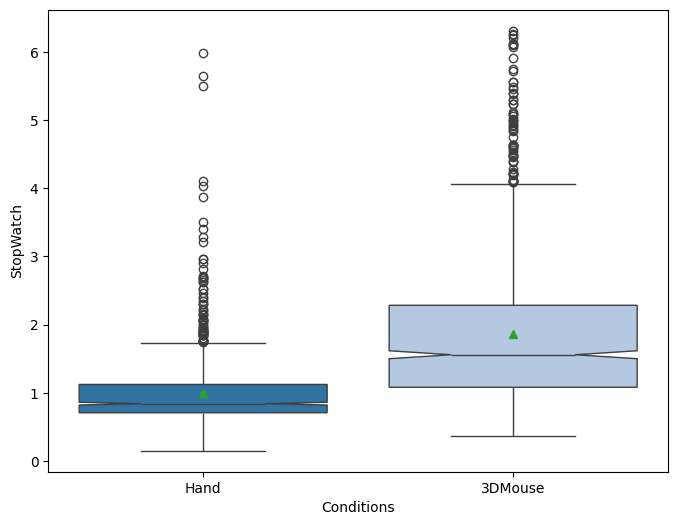

In [1175]:
f,ax = plt.subplots(1,1, figsize=(8, 6))
ax = sns.boxplot(data = allCountdowns[(allCountdowns['UX'] == 'Selection')], x = 'Conditions', y = 'StopWatch', showmeans = True, palette = 'tab20', notch = True, order = ['Hand','3DMouse'])

f.savefig('./StopWatchSelectionUX.pdf')


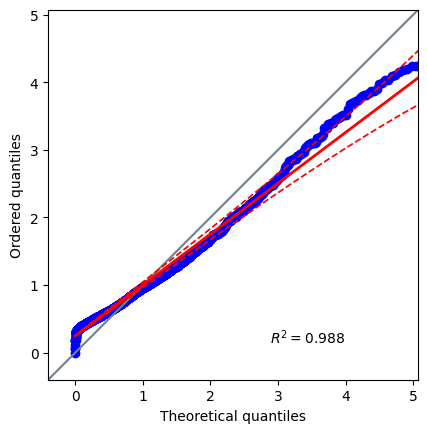

In [776]:
ax = pg.qqplot(allCountdowns[(allCountdowns['UX'] == 'Selection')]['StopWatch'], dist='expon')

In [777]:
pg.sphericity(data = allCountdowns[allCountdowns['UX'] == 'Selection'], 
            dv = 'StopWatch', within = ['Conditions'], subject = 'User')

(True, nan, nan, 1, 1.0)

In [778]:
pg.rm_anova(data = allCountdowns[allCountdowns['UX'] == 'Selection'], 
            dv = 'StopWatch', within = ['Conditions', 'SizeSelection'], subject = 'User', correction = 'auto', detailed = True, effsize = 'n2')



/Users/elodie.bouzbib/Library/Python/3.9/lib/python/site-packages/pingouin/distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
/Users/elodie.bouzbib/Library/Python/3.9/lib/python/site-packages/pingouin/distribution.py:507: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  data.groupby(level=1, axis=1, observed=True, group_keys=False)


Source         SS  ddof1  ddof2         MS          F  \
0                  Conditions  21.779115      1     17  21.779115  44.549596   
1               SizeSelection   3.351748      2     34   1.675874  39.235375   
2  Conditions * SizeSelection   0.327411      2     34   0.163705   3.748536   

          p-unc     p-GG-corr        n2       eps  
0  3.913472e-06  3.913472e-06  0.466494  1.000000  
1  1.470512e-09  2.501924e-08  0.071792  0.835827  
2  3.379441e-02  3.765900e-02  0.007013  0.925408

In [1181]:
pg.rm_anova(data = allCountdowns[allCountdowns['UX'] == 'PathTracing'], 
            dv = 'StopWatch', within = ['Conditions'], subject = 'User', correction = 'auto', detailed = True, effsize = 'n2')


Source         SS  DF        MS         F     p-unc        n2  eps
0  Conditions   6.117323   1  6.117323  2.259975  0.152237  0.043748  1.0
1       Error  43.308968  16  2.706811       NaN       NaN       NaN  NaN

In [1178]:
for i in range(0, len(configSize)):
    for k in range(0, len(conditions)):
        print(configSize[i], conditions[k])
        print(allCountdowns[(allCountdowns['UX'] == 'Selection') & (allCountdowns['SizeSelection'] == configSize[i])  & (allCountdowns['Conditions'] == conditions[k])]['StopWatch'].describe())

medium Hand
count    360.000000
mean       0.983695
std        0.481572
min        0.150173
25%        0.702573
50%        0.826683
75%        1.095490
max        4.108246
Name: StopWatch, dtype: float64
medium 3DMouse
count    354.000000
mean       1.852043
std        1.133346
min        0.393547
25%        1.066095
50%        1.484822
75%        2.224914
max        6.310677
Name: StopWatch, dtype: float64
large Hand
count    360.000000
mean       0.861792
std        0.314068
min        0.295792
25%        0.674554
50%        0.773500
75%        0.972256
max        4.038002
Name: StopWatch, dtype: float64
large 3DMouse
count    356.000000
mean       1.620510
std        0.839241
min        0.471893
25%        1.031842
50%        1.413986
75%        1.969655
max        5.557053
Name: StopWatch, dtype: float64
small Hand
count    358.000000
mean       1.156649
std        0.659572
min        0.229157
25%        0.767502
50%        0.942673
75%        1.390302
max        5.981224
Name: Sto

In [779]:
print(sm.stats.multicomp.pairwise_tukeyhsd(allCountdowns[(allCountdowns['UX'] == 'Selection')]['StopWatch'], groups = allCountdowns[(allCountdowns['UX'] == 'Selection')]['SizeSelection'], alpha=0.05))



Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
 large medium   0.1752 0.0014 0.0574  0.293   True
 large  small   0.3941    0.0 0.2756 0.5127   True
medium  small   0.2189    0.0 0.1003 0.3375   True
--------------------------------------------------


In [780]:
for i in range(0, len(configSize)):
    print('Config', configSize[i])
    print(sm.stats.multicomp.pairwise_tukeyhsd(allCountdowns[(allCountdowns['UX'] == 'Selection') & (allCountdowns['SizeSelection'] == configSize[i])]['StopWatch'], groups = allCountdowns[(allCountdowns['UX'] == 'Selection') & (allCountdowns['SizeSelection'] == configSize[i])]['Conditions'], alpha=0.05))
    

Config medium
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj  lower   upper  reject
----------------------------------------------------
3DMouse   Hand  -0.8683   0.0 -0.9959 -0.7408   True
----------------------------------------------------
Config large
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj  lower   upper  reject
----------------------------------------------------
3DMouse   Hand  -0.7587   0.0 -0.8515 -0.6659   True
----------------------------------------------------
Config small
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj  lower   upper  reject
----------------------------------------------------
3DMouse   Hand  -0.9797   0.0 -1.1279 -0.8316   True
----------------------------------------------------


In [781]:
sns.boxplot(data = allCountdowns[(allCountdowns['UX'] == 'Selection')],
            x = 'Conditions',
            y = 'StopWatch', 
            hue = allCountdowns['SizeSelection'],
            showmeans = True, palette = 'BuPu', notch = True)

<Axes: xlabel='Conditions', ylabel='StopWatch'>

In [782]:
sns.boxplot(data = allCountdowns[(allCountdowns['UX'] == 'Docking')],
            x = 'Conditions',
            y = 'StopWatch', 
            hue = allCountdowns['DirectionDocking'],
            showmeans = True, palette = 'BuPu', notch = True)

<Axes: xlabel='Conditions', ylabel='StopWatch'>

In [783]:
sns.boxplot(data = allCountdowns, x = 'Conditions', y = 'StopWatch', hue = 'UX', showmeans = True, palette = 'BuPu', notch = True)

<Axes: xlabel='Conditions', ylabel='StopWatch'>

In [784]:
#print(sm.stats.multicomp.pairwise_tukeyhsd(allCountdowns['StopWatch'], groups = allCountdowns['UX'], alpha=0.05))


## Significative for countdown for hand better than mouse

In [785]:
pg.rm_anova(data = allCountdowns[allCountdowns['UX'] == 'Docking'], 
            dv = 'StopWatch', within = ['Conditions', 'DirectionDocking'], subject = 'User', correction = 'auto', detailed = True, effsize = 'n2')


/Users/elodie.bouzbib/Library/Python/3.9/lib/python/site-packages/pingouin/distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
/Users/elodie.bouzbib/Library/Python/3.9/lib/python/site-packages/pingouin/distribution.py:507: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  data.groupby(level=1, axis=1, observed=True, group_keys=False)


Source         SS  ddof1  ddof2         MS  \
0                     Conditions  45.868142      1     16  45.868142   
1               DirectionDocking   2.847229      6     96   0.474538   
2  Conditions * DirectionDocking   5.241020      6     96   0.873503   

           F     p-unc  p-GG-corr        n2       eps  
0  14.227023  0.001669   0.001669  0.075396  1.000000  
1   0.979417  0.443528   0.427918  0.004680  0.706327  
2   1.884340  0.091280   0.129647  0.008615  0.618702

In [786]:
pg.rm_anova(data = allCountdowns[allCountdowns['UX'] == 'PathTracing'], 
            dv = 'StopWatch', within = ['Conditions'], subject = 'User', correction = 'auto', detailed = True, effsize = 'n2')


Source         SS  DF        MS         F     p-unc        n2  eps
0  Conditions   6.117323   1  6.117323  2.259975  0.152237  0.043748  1.0
1       Error  43.308968  16  2.706811       NaN       NaN       NaN  NaN

In [787]:
writeOutlierDocking

index BlockID Config StopWatch AccDistance    User Conditions       UX  \
0    0.0       0      2  11.36046    1.645455  User15    3DMouse  Docking   
1    2.0       0      6  15.37588    1.038536  User15    3DMouse  Docking   
2    4.0       0      1  11.35157    1.260522  User15    3DMouse  Docking   
3    5.0       0      4  14.39375    1.158365  User15    3DMouse  Docking   
4    9.0       1      2  13.67823    1.036293  User15    3DMouse  Docking   
5   10.0       1      5  13.01598    0.814516  User15    3DMouse  Docking   
6   12.0       1      3  12.97824    0.764332  User15    3DMouse  Docking   
7   13.0       1      6  12.78011      1.1755  User15    3DMouse  Docking   
8   18.0       2      5  13.76732    0.994376  User15    3DMouse  Docking   
9   19.0       2      4  18.72588    1.751788  User15    3DMouse  Docking   
10  10.0       1      3  11.58192    3.142515  User15       Hand  Docking   
11   0.0       0      0  11.43315    1.453403  User11    3DMouse  Docking   
12   1.0       0      6  14.39521    1.929585  User11    3DMouse  Docking   
13   4.0       0      3  12.64803    1.467355  User11    3DMouse  Docking   
14   6.0       0      1  11.94931    1.094551  User11    3DMouse  Docking   
15  10.0       1      3  12.41595     1.58388  User11    3DMouse  Docking   
16  11.0       1      1  12.36054    0.745467  User11       Hand  Docking   
17  10.0       1      6  13.60729    1.367582   User4    3DMouse  Docking   
18  15.0       2      6  16.44423    2.184039   User4    3DMouse  Docking   
19   0.0       0      1   4.46986    2.699936  User19       Hand  Docking   
20   9.0       1      5  7.033257    3.062425  User18       Hand  Docking   
21   4.0       0      4  4.184776    3.800403  User17       Hand  Docking   
22   5.0       0      0  4.175789    3.485602  User17       Hand  Docking   
23  12.0       1      0   3.93586    3.581858  User17       Hand  Docking   
24  13.0       1      4  3.295845    3.005663  User17       Hand  Docking   
25   0.0       0      3  7.259918    2.945532  User16       Hand  Docking   
26  15.0       2      3  5.929741     3.75784  User16       Hand  Docking   
27   3.0       0      1  7.122456    3.391505  User15       Hand  Docking   
28   6.0       0      0  6.770836    2.970967  User15       Hand  Docking   
29  14.0       2      1  9.358009    2.795948  User15       Hand  Docking   
30  19.0       2      6  4.991852    2.997291  User15       Hand  Docking   
31  18.0       2      1  3.408356    2.889208  User14       Hand  Docking   
32  15.0       2      3   8.98468    2.778019  User11       Hand  Docking   
33  20.0       2      1  6.416351     2.65078   User7       Hand  Docking   
34  12.0       1      1  5.144344    3.278573   User6       Hand  Docking   
35  14.0       2      0  3.182213    3.551737   User6       Hand  Docking   
36  17.0       2      3   3.39743    2.845989   User6       Hand  Docking   
37   7.0       1      6  5.979939    3.016882   User5       Hand  Docking   
38  11.0       1      1  5.433578    3.463776   User5       Hand  Docking   
39   9.0       1      6  4.323071    2.885155   User3       Hand  Docking   

   SizeSelection DirectionDocking CircuitID  
0            NaN                Z       NaN  
1            NaN              XYZ       NaN  
2            NaN                Y       NaN  
3            NaN               XZ       NaN  
4            NaN                Z       NaN  
5            NaN               YZ       NaN  
6            NaN               XY       NaN  
7            NaN              XYZ       NaN  
8            NaN               YZ       NaN  
9            NaN               XZ       NaN  
10           NaN               XY       NaN  
11           NaN                X       NaN  
12           NaN              XYZ       NaN  
13           NaN               XY       NaN  
14           NaN                Y       NaN  
15           NaN               XY       NaN  
16           NaN                Y       NaN  
17           NaN 

In [788]:
allDistances = pd.DataFrame()

for i in range(0, len(nameList)):
    for k in range(0, len(conditions)):
        resultsDistances = None

        resultsDistances = pd.read_csv('./UserData/' + nameList[i] + '/' + conditions[k] + '-Docking-Position.csv', sep = ';', decimal = '.')
        resultsDistances['User'] = nameList[i]
        resultsDistances['Conditions'] = conditions[k]
        resultsDistances['UX'] = 'Docking'
        allDistances = pd.concat([resultsDistances, allDistances], axis = 0)

for i in range(0, len(configDirection)):
    allDistances.loc[(allCountdowns['Config'] == i), 'DirectionDocking'] = configDirection[i]

del allDistances['RotationTarget'], allDistances['RotationFinal']

allDistances = allDistances.reset_index()
allDistances['DistanceFinal'].apply(lambda x: float(x))
allDistances['DistanceFinal'] = allDistances['DistanceFinal']*2

allDistances['PositionTargetX'].apply(lambda x: float(x))
allDistances['PositionTargetY'].apply(lambda x: float(x))
allDistances['PositionTargetZ'].apply(lambda x: float(x))
allDistances['PositionFinalX'].apply(lambda x: float(x))
allDistances['PositionFinalY'].apply(lambda x: float(x))
allDistances['PositionFinalZ'].apply(lambda x: float(x))

#NEED TO MULYIPLY BY TWO TO CONVERT INTO CM FROM UNITY (10 == 20cm in real life)
#allDistances['DistanceVerif'] = (allDistances['PositionTargetX'] - allDistances['PositionFinalX'])**2 + (allDistances['PositionTargetY'] - allDistances['PositionFinalY'])**2 + (allDistances['PositionTargetZ'] - allDistances['PositionFinalZ'])**2
#allDistances['VerifDistance'] = (allDistances['DistanceVerif']).apply(np.sqrt)

allDistances.loc[allDistances['DirectionDocking'] == 'X', 'AccuracyInDirection'] = 2*((allDistances['PositionTargetX'] - allDistances['PositionFinalX'])**2).apply(np.sqrt)
allDistances.loc[allDistances['DirectionDocking'] == 'Y', 'AccuracyInDirection'] = 2*((allDistances['PositionTargetY'] - allDistances['PositionFinalY'])**2).apply(np.sqrt)
allDistances.loc[allDistances['DirectionDocking'] == 'Z', 'AccuracyInDirection'] = 2*((allDistances['PositionTargetZ'] - allDistances['PositionFinalZ'])**2).apply(np.sqrt)

allDistances.loc[allDistances['DirectionDocking'] == 'XY', 'AccuracyInDirection'] = 2*((allDistances['PositionTargetX'] - allDistances['PositionFinalX'])**2 + (allDistances['PositionTargetY'] - allDistances['PositionFinalY'])**2).apply(np.sqrt)
allDistances.loc[allDistances['DirectionDocking'] == 'XZ', 'AccuracyInDirection'] = 2*((allDistances['PositionTargetX'] - allDistances['PositionFinalX'])**2 + (allDistances['PositionTargetZ'] - allDistances['PositionFinalZ'])**2).apply(np.sqrt)
allDistances.loc[allDistances['DirectionDocking'] == 'YZ', 'AccuracyInDirection'] = 2*((allDistances['PositionTargetY'] - allDistances['PositionFinalY'])**2 + (allDistances['PositionTargetZ'] - allDistances['PositionFinalZ'])**2).apply(np.sqrt)

allDistances.loc[allDistances['DirectionDocking'] == 'XYZ', 'AccuracyInDirection'] = 2*((allDistances['PositionTargetX'] - allDistances['PositionFinalX'])**2 + (allDistances['PositionTargetY'] - allDistances['PositionFinalY'])**2 + (allDistances['PositionTargetZ'] - allDistances['PositionFinalZ'])**2).apply(np.sqrt)

for i in range(0, len(writeOutlierDocking)):
    allDistances = allDistances.drop(allDistances[(allDistances['User'] == writeOutlierDocking['User'].iloc[i]) & (allDistances['Config'] == writeOutlierDocking['Config'].iloc[i]) & (allDistances['Conditions'] == writeOutlierDocking['Conditions'].iloc[i]) & (allDistances['BlockID'] == writeOutlierDocking['BlockID'].iloc[i])].index)


/var/folders/xd/qgqqknts7d16j8g06t07y4yw0000gn/T/ipykernel_21757/405395147.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  allDistances = pd.concat([resultsDistances, allDistances], axis = 0)


In [789]:
outlierCount = 0
removedLine = []

stats.zscore(allDistances['AccuracyInDirection'])
testOutliers = allDistances
for j in range(0, len(testOutliers['AccuracyInDirection'])):
    if(np.abs(stats.zscore(testOutliers['AccuracyInDirection']).iloc[j] > 3)):
        #print('Line', j, testOutliers['User'].iloc[j], 'Index', testOutliers.index[j])
        outlierCount = outlierCount + 1
        removedLine.append(testOutliers.index[j])

for i in range(0, outlierCount):
    #print(removedLine[i])
    allDistances = allDistances.drop(index = removedLine[i])

outlierCount

21

In [790]:
outlierCount = 0
removedLine = []

stats.zscore(allDistances['DistanceFinal'])
testOutliers = allDistances
for j in range(0, len(testOutliers['DistanceFinal'])):
    if(np.abs(stats.zscore(testOutliers['DistanceFinal']).iloc[j] > 3)):
        #print('Line', j, testOutliers['User'].iloc[j], 'Index', testOutliers.index[j])
        outlierCount = outlierCount + 1
        removedLine.append(testOutliers.index[j])

for i in range(0, outlierCount):
    #print(removedLine[i])
    allDistances = allDistances.drop(index = removedLine[i])

outlierCount

10

/var/folders/xd/qgqqknts7d16j8g06t07y4yw0000gn/T/ipykernel_21757/2935027588.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data = allDistances[(allDistances['UX'] == 'Docking')],


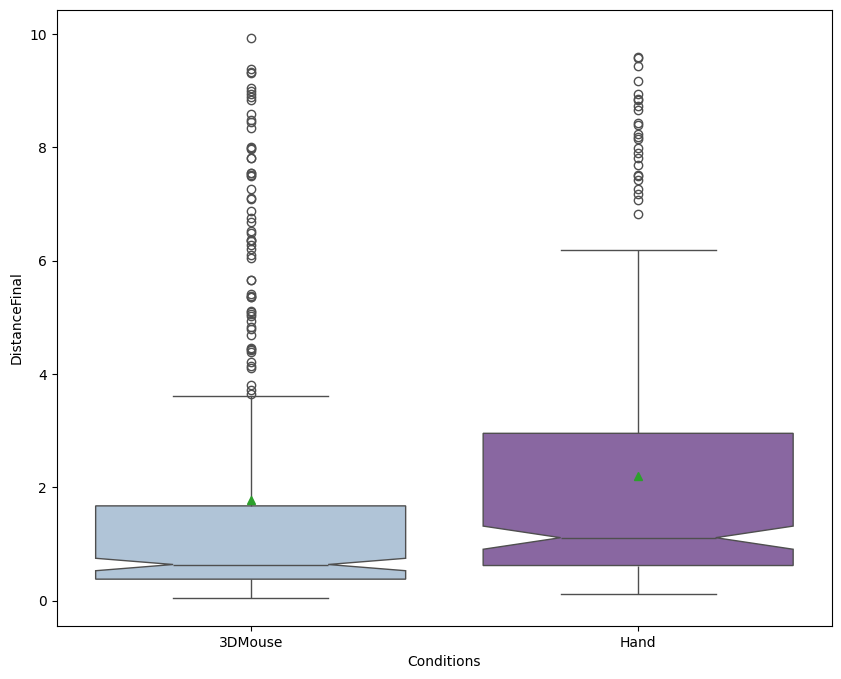

In [791]:
f,ax = plt.subplots(1,1, figsize=(10, 8))

ax = sns.boxplot(data = allDistances[(allDistances['UX'] == 'Docking')],
            x = 'Conditions',
            y = 'DistanceFinal',
            showmeans = True, palette = 'BuPu', notch = True)

f.savefig('./Accuracy-cm.pdf')


In [792]:
pg.rm_anova(data = allDistances[allDistances['UX'] == 'Docking'], 
            dv = 'DistanceFinal', within = ['Conditions', 'DirectionDocking'], subject = 'User', correction = 'auto', detailed = True, effsize = 'n2')


/Users/elodie.bouzbib/Library/Python/3.9/lib/python/site-packages/pingouin/distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
/Users/elodie.bouzbib/Library/Python/3.9/lib/python/site-packages/pingouin/distribution.py:507: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  data.groupby(level=1, axis=1, observed=True, group_keys=False)


Source         SS  ddof1  ddof2         MS  \
0                     Conditions  13.453939      1     15  13.453939   
1               DirectionDocking  11.366742      6     90   1.894457   
2  Conditions * DirectionDocking   5.690452      6     90   0.948409   

           F     p-unc  p-GG-corr        n2       eps  
0  10.342403  0.005772   0.005772  0.019198  1.000000  
1   0.774487  0.592004   0.525017  0.016220  0.550812  
2   0.408039  0.871955   0.818849  0.008120  0.731106

In [793]:
ax = pg.qqplot(allDistances['DistanceFinal'], dist='expon')
ax = pg.qqplot(allDistances['AccuracyInDirection'], dist='expon')

In [794]:
allDistances[allDistances['Conditions'] == 'Hand']['DistanceFinal'].describe(), allDistances[allDistances['Conditions'] == '3DMouse']['DistanceFinal'].describe()

(count    321.000000
 mean       2.198512
 std        2.310187
 min        0.112600
 25%        0.618400
 50%        1.110200
 75%        2.952600
 max        9.595800
 Name: DistanceFinal, dtype: float64,
 count    343.000000
 mean       1.771725
 std        2.413493
 min        0.050200
 25%        0.378000
 50%        0.636600
 75%        1.671600
 max        9.936200
 Name: DistanceFinal, dtype: float64)

In [795]:
pg.rm_anova(data = allDistances[allDistances['UX'] == 'Docking'], 
            dv = 'AccuracyInDirection', within = ['Conditions', 'DirectionDocking'], subject = 'User', correction = 'auto', detailed = True, effsize = 'n2')


/Users/elodie.bouzbib/Library/Python/3.9/lib/python/site-packages/pingouin/distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
/Users/elodie.bouzbib/Library/Python/3.9/lib/python/site-packages/pingouin/distribution.py:507: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  data.groupby(level=1, axis=1, observed=True, group_keys=False)


Source         SS  ddof1  ddof2        MS         F  \
0                     Conditions   5.532500      1     15  5.532500  5.559987   
1               DirectionDocking  52.836801      6     90  8.806133  4.928401   
2  Conditions * DirectionDocking   2.683803      6     90  0.447300  0.248922   

      p-unc  p-GG-corr        n2       eps  
0  0.032373   0.032373  0.010867  1.000000  
1  0.000212   0.002549  0.103784  0.599922  
2  0.958566   0.894362  0.005272  0.605467

In [796]:
allDistances[allDistances['Conditions'] == 'Hand']['AccuracyInDirection'].describe(), allDistances[allDistances['Conditions'] == '3DMouse']['AccuracyInDirection'].describe()

(count    321.000000
 mean       1.492457
 std        1.866017
 min        0.015600
 25%        0.350800
 50%        0.717845
 75%        1.952123
 max        8.983892
 Name: AccuracyInDirection, dtype: float64,
 count    343.000000
 mean       1.206600
 std        1.923794
 min        0.000000
 25%        0.201700
 50%        0.398200
 75%        1.046197
 max        9.039125
 Name: AccuracyInDirection, dtype: float64)

/var/folders/xd/qgqqknts7d16j8g06t07y4yw0000gn/T/ipykernel_21757/2114229278.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = allDistances[(allDistances['UX'] == 'Docking')],


<Axes: xlabel='Conditions', ylabel='AccuracyInDirection'>

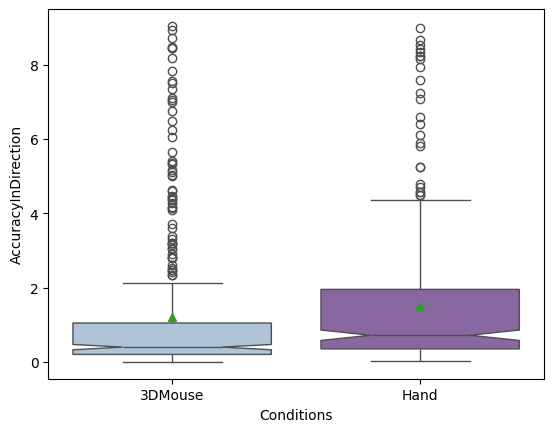

In [797]:
sns.boxplot(data = allDistances[(allDistances['UX'] == 'Docking')],
            x = 'Conditions',
            y = 'AccuracyInDirection',
            showmeans = True, palette = 'BuPu', notch = True)

In [798]:
allDistances['DirectionDocking']

1        Y
2        Z
3       XY
4       XZ
5       XY
      ... 
730     XZ
731     YZ
732     XY
733      Z
734    XYZ
Name: DirectionDocking, Length: 664, dtype: object

In [799]:
pg.rm_anova(data = allDistances[allDistances['UX'] == 'Docking'], 
            dv = 'AccuracyInDirection', within = ['Conditions', 'DirectionDocking'], subject = 'User', correction = 'auto', detailed = True, effsize = 'n2')


/Users/elodie.bouzbib/Library/Python/3.9/lib/python/site-packages/pingouin/distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
/Users/elodie.bouzbib/Library/Python/3.9/lib/python/site-packages/pingouin/distribution.py:507: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  data.groupby(level=1, axis=1, observed=True, group_keys=False)


Source         SS  ddof1  ddof2        MS         F  \
0                     Conditions   5.532500      1     15  5.532500  5.559987   
1               DirectionDocking  52.836801      6     90  8.806133  4.928401   
2  Conditions * DirectionDocking   2.683803      6     90  0.447300  0.248922   

      p-unc  p-GG-corr        n2       eps  
0  0.032373   0.032373  0.010867  1.000000  
1  0.000212   0.002549  0.103784  0.599922  
2  0.958566   0.894362  0.005272  0.605467

In [800]:
print(sm.stats.multicomp.pairwise_tukeyhsd(allDistances['AccuracyInDirection'], groups = allDistances['Conditions'], alpha=0.05))


Multiple Comparison of Means - Tukey HSD, FWER=0.05
 group1 group2 meandiff p-adj   lower  upper reject
---------------------------------------------------
3DMouse   Hand   0.2859 0.0526 -0.0033 0.575  False
---------------------------------------------------


In [801]:
print(sm.stats.multicomp.pairwise_tukeyhsd(allDistances['DistanceFinal'], groups = allDistances['Conditions'], alpha=0.05))


Multiple Comparison of Means - Tukey HSD, FWER=0.05
 group1 group2 meandiff p-adj  lower  upper  reject
---------------------------------------------------
3DMouse   Hand   0.4268 0.0204 0.0663 0.7873   True
---------------------------------------------------


In [802]:
print(sm.stats.multicomp.pairwise_tukeyhsd(allDistances['AccuracyInDirection'], groups = allDistances['DirectionDocking'], alpha=0.05))


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     X     XY    0.551 0.3969  -0.252   1.354  False
     X    XYZ   0.9825 0.0059  0.1795  1.7855   True
     X     XZ   0.4806 0.5688 -0.3224  1.2836  False
     X      Y  -0.1099 0.9997 -0.9129  0.6931  False
     X     YZ   0.9304 0.0408  0.0216  1.8391   True
     X      Z  -0.3639 0.7896 -1.1204  0.3927  False
    XY    XYZ   0.4315 0.6633 -0.3517  1.2147  False
    XY     XZ  -0.0704    1.0 -0.8536  0.7128  False
    XY      Y  -0.6609 0.1624 -1.4441  0.1223  False
    XY     YZ   0.3793 0.8704  -0.512  1.2706  False
    XY      Z  -0.9149 0.0047 -1.6504 -0.1794   True
   XYZ     XZ  -0.5019 0.4842 -1.2851  0.2813  False
   XYZ      Y  -1.0924 0.0008 -1.8756 -0.3092   True
   XYZ     YZ  -0.0522    1.0 -0.9435  0.8391  False
   XYZ      Z  -1.3464    0.0 -2.0819 -0.6109   True
    XZ      Y  -0.5905 0.2809 -1.3737  0.1927 

In [803]:
for i in range(0, len(configDirection)):
    print('Direction', configDirection[i], 'Accuracy in direction')
    print(sm.stats.multicomp.pairwise_tukeyhsd(allDistances[allDistances['DirectionDocking'] == configDirection[i]]['AccuracyInDirection'], groups = allDistances[allDistances['DirectionDocking'] == configDirection[i]]['Conditions'], alpha=0.05))


Direction X Accuracy in direction
Multiple Comparison of Means - Tukey HSD, FWER=0.05
 group1 group2 meandiff p-adj   lower  upper reject
---------------------------------------------------
3DMouse   Hand   0.0364 0.9108 -0.6073  0.68  False
---------------------------------------------------
Direction Y Accuracy in direction
Multiple Comparison of Means - Tukey HSD, FWER=0.05
 group1 group2 meandiff p-adj  lower  upper  reject
---------------------------------------------------
3DMouse   Hand     0.45 0.0254 0.0567 0.8434   True
---------------------------------------------------
Direction Z Accuracy in direction
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj   lower  upper  reject
----------------------------------------------------
3DMouse   Hand   0.3999 0.1274 -0.1158 0.9155  False
----------------------------------------------------
Direction XY Accuracy in direction
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p

In [804]:
allDistances[(allDistances['DirectionDocking'] == 'Z') & (allDistances['Conditions'] == 'Hand')]['AccuracyInDirection'].describe()

count    62.000000
mean      0.891523
std       1.701028
min       0.015600
25%       0.134550
50%       0.352800
75%       0.605650
max       8.350800
Name: AccuracyInDirection, dtype: float64

In [805]:
allDistances[(allDistances['DirectionDocking'] == 'Z') & (allDistances['Conditions'] == '3DMouse')]['AccuracyInDirection'].describe()

count    65.000000
mean      0.491662
std       1.203629
min       0.000000
25%       0.109800
50%       0.186400
75%       0.301400
max       8.706200
Name: AccuracyInDirection, dtype: float64

In [806]:
sns.boxplot(data = allCountdowns[(allCountdowns['UX'] == 'Docking')],
            x = 'Conditions',
            y = 'AccDistance', hue = 'DirectionDocking',
            showmeans = True, palette = 'BuPu', notch = True)

<Axes: xlabel='Conditions', ylabel='AccDistance'>

/var/folders/xd/qgqqknts7d16j8g06t07y4yw0000gn/T/ipykernel_21757/888361822.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = allCountdowns[(allCountdowns['UX'] == 'Docking')],


<Axes: xlabel='Conditions', ylabel='AccDistance'>

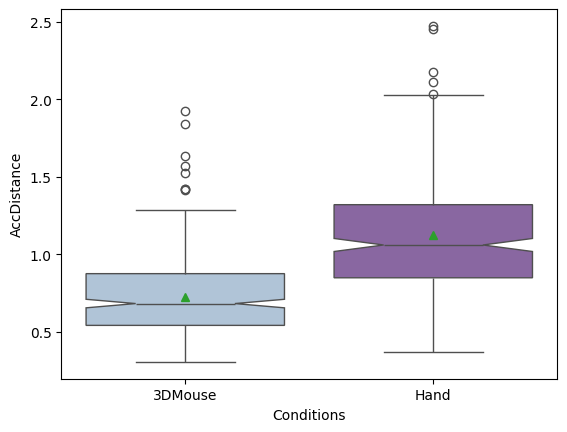

In [807]:
sns.boxplot(data = allCountdowns[(allCountdowns['UX'] == 'Docking')],
            x = 'Conditions',
            y = 'AccDistance',
            showmeans = True, palette = 'BuPu', notch = True)

In [808]:
allCountdowns[allCountdowns['AccDistance'] > 3]

index BlockID Config  StopWatch  AccDistance    User Conditions  \
86      0.0       0      0   8.753071     3.112171  User20       Hand   
347     3.0       0      3   8.082211     3.240855  User18    3DMouse   
1119    1.0       0      1   4.034845     3.051085  User14       Hand   
1637    3.0       0      3   7.467770     3.038560  User10       Hand   
1960    3.0       0      3   4.819012     3.384289   User8       Hand   
2647    2.0       0      2  10.667080     3.300767   User4       Hand   
2649    4.0       0      4   9.519867     3.016099   User4       Hand   

               UX SizeSelection DirectionDocking  CircuitID  
86    PathTracing           NaN              NaN        0.0  
347   PathTracing           NaN              NaN        3.0  
1119  PathTracing           NaN              NaN        1.0  
1637  PathTracing           NaN              NaN        3.0  
1960  PathTracing           NaN              NaN        3.0  
2647  PathTracing           NaN              NaN        2.0  
2649  PathTracing           NaN              NaN        4.0

In [809]:
pg.rm_anova(data = allCountdowns[allCountdowns['UX'] == 'Docking'], 
            dv = 'AccDistance', within = ['Conditions'], subject = 'User', correction = 'auto', detailed = True, effsize = 'n2')


Source        SS  DF        MS          F     p-unc        n2  eps
0  Conditions  1.529341   1  1.529341  38.314683  0.000013  0.540698  1.0
1       Error  0.638645  16  0.039915        NaN       NaN       NaN  NaN

In [810]:
print(sm.stats.multicomp.pairwise_tukeyhsd(allCountdowns[allCountdowns['UX'] == 'Docking']['AccDistance'], groups = allCountdowns[allCountdowns['UX'] == 'Docking']['Conditions'], alpha=0.05))


Multiple Comparison of Means - Tukey HSD, FWER=0.05
 group1 group2 meandiff p-adj lower  upper  reject
--------------------------------------------------
3DMouse   Hand   0.3991   0.0 0.3518 0.4464   True
--------------------------------------------------


In [811]:
for i in range(0, len(configDirection)):
    print('Direction', configDirection[i], ' Accumulated distance')
    print(sm.stats.multicomp.pairwise_tukeyhsd(allCountdowns[allCountdowns['DirectionDocking'] == configDirection[i]]['AccDistance'], groups = allCountdowns[allCountdowns['DirectionDocking'] == configDirection[i]]['Conditions'], alpha=0.05))


Direction X  Accumulated distance
Multiple Comparison of Means - Tukey HSD, FWER=0.05
 group1 group2 meandiff p-adj lower  upper  reject
--------------------------------------------------
3DMouse   Hand   0.4512   0.0 0.3488 0.5536   True
--------------------------------------------------
Direction Y  Accumulated distance
Multiple Comparison of Means - Tukey HSD, FWER=0.05
 group1 group2 meandiff p-adj lower  upper reject
-------------------------------------------------
3DMouse   Hand   0.4317   0.0 0.3064 0.557   True
-------------------------------------------------
Direction Z  Accumulated distance
Multiple Comparison of Means - Tukey HSD, FWER=0.05
 group1 group2 meandiff p-adj lower  upper  reject
--------------------------------------------------
3DMouse   Hand   0.3811   0.0 0.2535 0.5087   True
--------------------------------------------------
Direction XY  Accumulated distance
Multiple Comparison of Means - Tukey HSD, FWER=0.05
 group1 group2 meandiff p-adj lower  upper  rej

## All significative for accumulated distance on condition, with better results for mouse. Accuracy significative on Z with better on mouse  

<Axes: xlabel='Conditions', ylabel='DistanceFinal'>

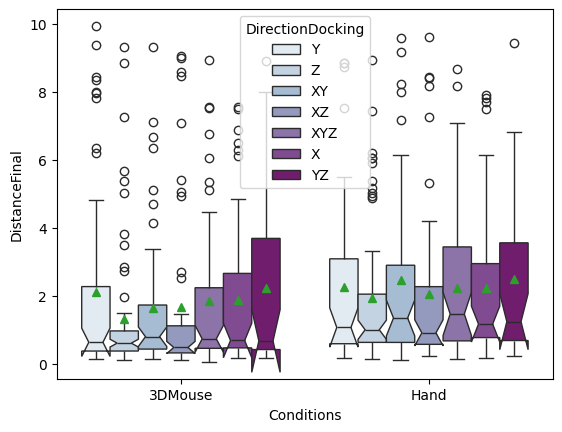

In [571]:
sns.boxplot(data = allDistances[(allDistances['UX'] == 'Docking')],
            x = 'Conditions',
            y = 'DistanceFinal', 
            hue = allDistances['DirectionDocking'],
            showmeans = True, palette = 'BuPu', notch = True)

In [572]:
allDistances

index BlockID TrialID Config  DistanceFinal  PositionTargetX  \
1        1       0       1      2         8.3508           1.4150   
2        2       0       2      4         0.7378           2.6639   
3        3       0       3      6         0.9046           1.7687   
4        4       0       4      0         0.4224          -1.5749   
5        5       0       5      5         3.3590          -1.7444   
..     ...     ...     ...    ...            ...              ...   
730     16       2      16      5         0.7062          -1.9702   
731     17       2      17      0         0.5112           0.3843   
732     18       2      18      6         1.5190           0.6568   
733     19       2      19      3         1.0064          -2.6672   
734     20       2      20      4         0.4892           0.2448   

     PositionTargetY  PositionTargetZ  PositionFinalX  PositionFinalY  \
1             0.2762           0.3709         -1.8540          0.9697   
2            -0.0924          -2.7347          2.9211          0.1424   
3            -1.0828           2.0193          2.0930         -0.7677   
4             0.7800          -0.8968         -1.6647          0.6052   
5             0.0433          -0.4295         -0.6660         -1.0529   
..               ...              ...             ...             ...   
730          -0.5593           2.3503         -2.1116         -0.8800   
731          -0.4694          -3.0557          0.6050         -0.5364   
732          -1.1509           0.6120          1.0282         -0.4904   
733           1.0330           3.4724         -2.7247          0.5499   
734           0.5977           2.5309          0.0374          0.6428   

     PositionFinalZ    User Conditions       UX DirectionDocking  \
1            2.8741  User20    3DMouse  Docking                Y   
2           -2.6131  User20    3DMouse  Docking                Z   
3            2.0311  User20    3DMouse  Docking               XY   
4           -0.9739  User20    3DMouse  Docking               XZ   
5            0.2460  User20    3DMouse  Docking               XY   
..              ...     ...        ...      ...              ...   
730          2.3925   User1       Hand  Docking               XZ   
731         -3.1659   User1       Hand  Docking               YZ   
732          0.5606   User1       Hand  Docking               XY   
733          3.3441   User1       Hand  Docking                Z   
734          2.4092   User1       Hand  Docking              XYZ   

     AccuracyInDirection  
1               1.387000  
2               0.243200  
3               0.904342  
4               0.236715  
5               3.075452  
..                   ...  
730             0.295126  
731             0.257938  
732             1.515517  
733             0.256600  
734             0.489325  

[664 rows x 16 columns]

In [573]:
sns.boxplot(data = allDistances[(allDistances['UX'] == 'Docking')],
            x = 'Conditions',
            y = 'AccuracyInDirection', 
            hue = allDistances['DirectionDocking'],
            showmeans = True, palette = 'BuPu', notch = True)

<Axes: xlabel='Conditions', ylabel='AccuracyInDirection'>

In [574]:
headers = ['BlockID', 'Frame', 'StopWatch', 'PosX', 'PosY', 'PosZ']

In [575]:
writeOutlierPathTracing

index BlockID Config StopWatch AccDistance    User Conditions           UX  \
0   2.0       0      2  18.97876    2.301507  User11    3DMouse  PathTracing   
1   4.0       0      4    18.313    2.336265  User11    3DMouse  PathTracing   
2   4.0       0      4  7.025513    3.900026  User10       Hand  PathTracing   

  SizeSelection DirectionDocking CircuitID  
0           NaN              NaN       2.0  
1           NaN              NaN       4.0  
2           NaN              NaN       4.0

In [1089]:
allCircuits = pd.DataFrame()

for i in range(0, len(nameList)):
    for k in range(0, len(conditions)):
        resultsCircuits = None
        
        for j in range(0, len(measureCircuit)):
            resultsCircuits = pd.read_csv('./UserData/' + nameList[i] + '/' + conditions[k] + '-PathTracing-' + measureCircuit[j] + '.csv', sep = ';', decimal = '.', names = headers, skiprows = [0,2])
            resultsCircuits['User'] = nameList[i]
            resultsCircuits['Conditions'] = conditions[k]
            resultsCircuits['CircuitID'] = measureCircuit[j]
            resultsCircuits['UX'] = 'PathTracing'
            allCircuits = pd.concat([resultsCircuits, allCircuits], axis = 0)

allCircuits['StopWatch'].apply(lambda x: float(x))
allCircuits = allCircuits[allCircuits['PosX'] < 4]
allCircuits = allCircuits[allCircuits['PosY'] < 2]
allCircuits = allCircuits[allCircuits['PosZ'] < 4]
allCircuits = allCircuits[allCircuits['PosX'] > -4]
allCircuits = allCircuits[allCircuits['PosY'] > -2]
allCircuits = allCircuits[allCircuits['PosZ'] > -4]

for i in range(0, len(writeOutlierPathTracing)):
    allCircuits = allCircuits.drop(allCircuits[(allCircuits['User'] == writeOutlierPathTracing['User'].iloc[i]) & (allCircuits['CircuitID'] == writeOutlierPathTracing['CircuitID'].iloc[i]) & (allCircuits['Conditions'] == writeOutlierPathTracing['Conditions'].iloc[i])].index)


In [1090]:
allCircuits.head()

BlockID  Frame  StopWatch    PosX   PosY   PosZ    User Conditions  \
0        0      1   0.049927  1.7021  0.616 -2.852  User20    3DMouse   
1        0      3   0.084286  1.7021  0.616 -2.852  User20    3DMouse   
2        0      4   0.101349  1.7021  0.616 -2.852  User20    3DMouse   
3        0      5   0.120125  1.7021  0.616 -2.852  User20    3DMouse   
4        0      6   0.139626  1.7021  0.616 -2.852  User20    3DMouse   

  CircuitID           UX  
0  Circuit4  PathTracing  
1  Circuit4  PathTracing  
2  Circuit4  PathTracing  
3  Circuit4  PathTracing  
4  Circuit4  PathTracing

In [1091]:
allCircuits['PositionAbsolute'] = (allCircuits['PosX']**2 + allCircuits['PosY']**2 + allCircuits['PosZ']**2).apply(np.sqrt)


In [1093]:

realAccDistancePT = pd.DataFrame()

In [1094]:
allCircuits = allCircuits.dropna()
line = 0
for i in range(0, len(nameList)):
    for j in range(0, 5):
        newDf = pd.DataFrame()
        cond = (allCircuits['CircuitID'] == measureCircuit[j]) & (allCircuits['User'] == nameList[i])  & (allCircuits['Conditions'] == conditions[0])
        allCircuits['PositionSubstraction'] = abs(allCircuits[cond]['PositionAbsolute'].diff().fillna(0))*2
        newDf=abs(allCircuits[cond]['PositionAbsolute'].diff().fillna(0))*2
        realAccDistancePT.loc[line, 'User'] = nameList[i]
        realAccDistancePT.loc[line, 'Conditions'] = conditions[0]
        realAccDistancePT.loc[line, 'CircuitID'] = measureCircuit[j]
        realAccDistancePT.loc[line, 'AccDistance'] = newDf.sum()
        line = line + 1

for i in range(0, len(nameList)):
    for j in range(0, 5):
        newDf = pd.DataFrame()
        cond = (allCircuits['CircuitID'] == measureCircuit[j]) & (allCircuits['User'] == nameList[i])  & (allCircuits['Conditions'] == conditions[1])
        allCircuits['PositionSubstraction'] = abs(allCircuits[cond]['PositionAbsolute'].diff().fillna(0))*2
        newDf=abs(allCircuits[cond]['PositionAbsolute'].diff().fillna(0))*2
        realAccDistancePT.loc[line, 'User'] = nameList[i]
        realAccDistancePT.loc[line, 'Conditions'] = conditions[1]
        realAccDistancePT.loc[line, 'CircuitID'] = measureCircuit[j]
        realAccDistancePT.loc[line, 'AccDistance'] = newDf.sum()
        line = line + 1

#multiply by 2 because of the scale of the diffuser
allCircuits = allCircuits.dropna()



In [1095]:
realAccDistancePT[realAccDistancePT['User'] == 'User19']

User Conditions CircuitID  AccDistance
80   User19       Hand  Circuit0    13.426115
81   User19       Hand  Circuit1    12.492389
82   User19       Hand  Circuit2    12.876724
83   User19       Hand  Circuit3    12.198558
84   User19       Hand  Circuit4    16.344852
170  User19    3DMouse  Circuit0    19.664080
171  User19    3DMouse  Circuit1    25.488701
172  User19    3DMouse  Circuit2    21.810529
173  User19    3DMouse  Circuit3    22.665452
174  User19    3DMouse  Circuit4    15.884945

In [1096]:
allCircuits['PositionSubstraction'].describe()


count    62964.000000
mean         0.047860
std          0.047363
min          0.000000
25%          0.009028
50%          0.035444
75%          0.069858
max          0.178062
Name: PositionSubstraction, dtype: float64

In [1097]:
newDf.sum()

np.float64(20.11634956201867)

In [1098]:
outlierCount = 0
removedLine = []

stats.zscore(realAccDistancePT['AccDistance'])
testOutliers = realAccDistancePT
for j in range(0, len(testOutliers['AccDistance'])):
    if(np.abs(stats.zscore(testOutliers['AccDistance']).iloc[j] > 3)):
        print('Line', j, testOutliers['User'].iloc[j])
        outlierCount = outlierCount + 1
        removedLine.append(testOutliers.index[j])

for i in range(0, outlierCount):
    #print(removedLine[i])
    realAccDistancePT = realAccDistancePT.drop(index = removedLine[i])

outlierCount

Line 40 User10
Line 41 User10
Line 67 User16
Line 69 User16


4

In [1099]:
allCircuits[(allCircuits['CircuitID'] == measureCircuit[0]) & (allCircuits['User'] == nameList[0])  & (allCircuits['Conditions'] == conditions[0])][-20:]

BlockID  Frame  StopWatch    PosX    PosY    PosZ   User Conditions  \
405        0    406   10.74920  2.4812  0.7547  0.0934  User1       Hand   
406        0    407   10.77478  2.4812  0.7547  0.0934  User1       Hand   
407        0    408   10.79908  2.4812  0.7547  0.0934  User1       Hand   
408        0    409   10.82836  2.5338  0.6686 -0.1133  User1       Hand   
409        0    410   10.85171  2.5338  0.6686 -0.1133  User1       Hand   
410        0    411   10.87981  2.5247  0.5714 -0.1373  User1       Hand   
411        0    412   10.90460  2.5247  0.5714 -0.1373  User1       Hand   
412        0    413   10.93497  2.5062  0.5820 -0.3214  User1       Hand   
413        0    414   10.96332  2.5221  0.6887 -0.6026  User1       Hand   
414        0    415   10.98731  2.5221  0.6887 -0.6026  User1       Hand   
415        0    416   11.01672  2.5803  0.6693 -0.7832  User1       Hand   
416        0    417   11.04470  2.5446  0.7149 -0.7582  User1       Hand   
417        0    418   11.06874  2.5446  0.7149 -0.7582  User1       Hand   
418        0    419   11.09738  2.5071  0.7017 -0.8776  User1       Hand   
419        0    420   11.12593  2.5824  0.6907 -0.8914  User1       Hand   
420        0    421   11.15393  2.5052  0.6032 -1.1463  User1       Hand   
421        0    422   11.17820  2.5052  0.6032 -1.1463  User1       Hand   
422        0    423   11.20640  2.5225  0.5772 -1.2943  User1       Hand   
423        0    424   11.23519  2.5860  0.6603 -1.1526  User1       Hand   
424        0    425   11.26310  2.5645  0.6091 -1.4190  User1       Hand   

    CircuitID           UX  PositionAbsolute  PositionSubstraction  
405  Circuit0  PathTracing          2.595120              0.003071  
406  Circuit0  PathTracing          2.595120              0.000000  
407  Circuit0  PathTracing          2.595120              0.000000  
408  Circuit0  PathTracing          2.622976              0.000000  
409  Circuit0  PathTracing          2.622976              0.000000  
410  Circuit0  PathTracing          2.592192              0.000000  
411  Circuit0  PathTracing          2.592192              0.000000  
412  Circuit0  PathTracing          2.592886              0.000000  
413  Circuit0  PathTracing          2.682988              0.000000  
414  Circuit0  PathTracing          2.682988              0.000000  
415  Circuit0  PathTracing          2.778365              0.000000  
416  Circuit0  PathTracing          2.749716              0.000000  
417  Circuit0  PathTracing          2.749716              0.000000  
418  Circuit0  PathTracing          2.747383              0.000000  
419  Circuit0  PathTracing          2.817880              0.000000  
420  Circuit0  PathTracing          2.820263              0.000000  
421  Circuit0  PathTracing          2.820263              0.000000  
422  Circuit0  PathTracing          2.893333              0.000000  
423  Circuit0  PathTracing          2.907212              0.000000  
424  Circuit0  PathTracing          2.993530              0.000000

In [1100]:
#realAccDistancePT = pd.DataFrame()
#line = 0
#for i in range(0, len(nameList)):
#    for j in range(0, 5):
#        for k in range(0, len(conditions)):
#            cond = (allCircuits['CircuitID'] == measureCircuit[j]) & (allCircuits['User'] == nameList[i])  & (allCircuits['Conditions'] == conditions[k])
#            realAccDistancePT.loc[line, 'User'] = nameList[i]
#            realAccDistancePT.loc[line, 'Conditions'] = conditions[k]
#            realAccDistancePT.loc[line, 'CircuitID'] = measureCircuit[j]
#            realAccDistancePT.loc[line, 'AccDistance'] = allCircuits[cond]['PositionSubstraction'].sum()
#            line = line + 1


In [1101]:
realAccDistancePT[realAccDistancePT['User'] == 'User1']

User Conditions CircuitID  AccDistance
0   User1       Hand  Circuit0    20.881858
1   User1       Hand  Circuit1    19.845946
2   User1       Hand  Circuit2    15.637595
3   User1       Hand  Circuit3    16.728986
4   User1       Hand  Circuit4    24.455405
90  User1    3DMouse  Circuit0    11.387570
91  User1    3DMouse  Circuit1    12.364009
92  User1    3DMouse  Circuit2    16.356681
93  User1    3DMouse  Circuit3     9.367055
94  User1    3DMouse  Circuit4    16.094640

<Axes: xlabel='Conditions', ylabel='AccDistance'>

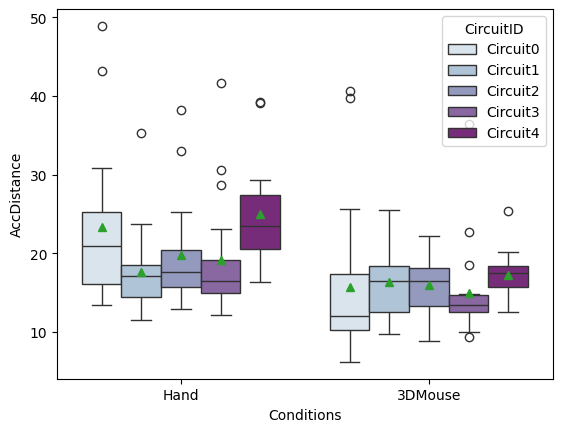

In [1102]:
sns.boxplot(data = realAccDistancePT,
            x = 'Conditions',
            y = 'AccDistance', hue = 'CircuitID',
            showmeans = True, palette = 'BuPu')

In [1103]:
realAccDistancePT[realAccDistancePT['Conditions'] == 'Hand']['AccDistance'].describe(), realAccDistancePT[realAccDistancePT['Conditions'] == '3DMouse']['AccDistance'].describe()

(count    86.000000
 mean     20.948752
 std       7.674420
 min      11.454668
 25%      15.693105
 50%      18.442824
 75%      23.670958
 max      48.898314
 Name: AccDistance, dtype: float64,
 count    90.000000
 mean     16.048850
 std       5.954894
 min       6.168919
 25%      12.467365
 50%      15.053740
 75%      18.134130
 max      40.672977
 Name: AccDistance, dtype: float64)

In [1183]:
f,ax = plt.subplots(1,1, figsize=(7, 5))

ax = sns.boxplot(data = realAccDistancePT,
            x = 'CircuitID',
            y = 'AccDistance', hue = 'Conditions',
            showmeans = True, palette = 'tab20')

f.savefig('./AccumulatedDistancePathTracing.pdf')

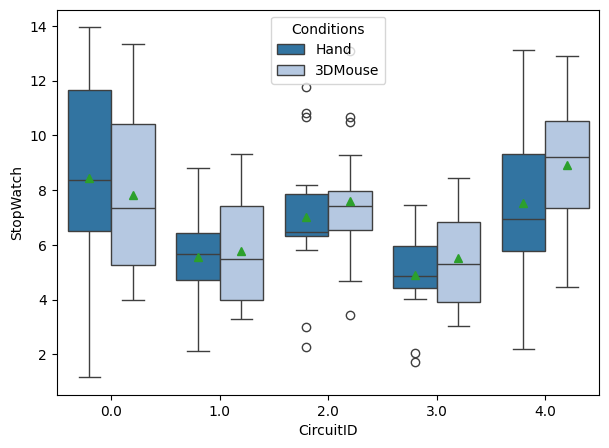

In [1191]:
f,ax = plt.subplots(1,1, figsize=(7, 5))
hue_order = ['Hand', '3DMouse']
ax = sns.boxplot(data = allCountdowns,
            x = 'CircuitID',
            y = 'StopWatch', hue = 'Conditions',
            showmeans = True, palette = 'tab20', hue_order = hue_order)

f.savefig('./StopWatchPathTracing.pdf')

In [1194]:
for k in range(0, len(conditions)):
    print(conditions[k])
    print(allCountdowns[(allCountdowns['UX'] == 'PathTracing') & (allCountdowns['Conditions'] == conditions[k])]['StopWatch'].describe())

Hand
count    70.000000
mean      6.604769
std       2.936466
min       1.164454
25%       4.830932
50%       6.345569
75%       8.080054
max      13.949080
Name: StopWatch, dtype: float64
3DMouse
count    86.000000
mean      7.087260
std       2.607956
min       3.045017
25%       4.873104
50%       6.868714
75%       8.701785
max      13.320020
Name: StopWatch, dtype: float64


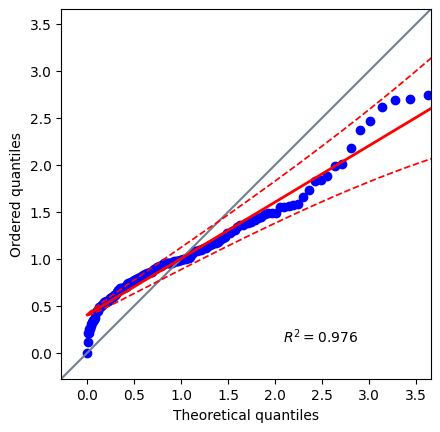

In [1105]:
ax = pg.qqplot(realAccDistancePT['AccDistance'], dist='expon')

In [1168]:
pg.rm_anova(data = realAccDistancePT, 
            dv = 'AccDistance', within = ['Conditions', 'CircuitID'], subject = 'User', correction = 'auto', detailed = True, effsize = 'n2')


/Users/elodie.bouzbib/Library/Python/3.9/lib/python/site-packages/pingouin/distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
/Users/elodie.bouzbib/Library/Python/3.9/lib/python/site-packages/pingouin/distribution.py:507: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  data.groupby(level=1, axis=1, observed=True, group_keys=False)


Source          SS  ddof1  ddof2          MS         F  \
0              Conditions  449.931301      1     15  449.931301  4.525840   
1               CircuitID  393.378586      4     60   98.344647  2.731134   
2  Conditions * CircuitID  255.241967      4     60   63.810492  4.153704   

      p-unc  p-GG-corr        n2       eps  
0  0.050384   0.050384  0.068625  1.000000  
1  0.037192   0.090603  0.060000  0.431651  
2  0.004904   0.016941  0.038931  0.622594

In [1170]:
for i in range(0, len(measureCircuit)):
    print(measureCircuit[i])
    print(sm.stats.multicomp.pairwise_tukeyhsd(realAccDistancePT[realAccDistancePT['CircuitID'] == measureCircuit[i]]['AccDistance'], groups = realAccDistancePT[realAccDistancePT['CircuitID'] == measureCircuit[i]]['Conditions'], alpha=0.05))


Circuit0
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj  lower   upper  reject
----------------------------------------------------
3DMouse   Hand   7.5737 0.0304 0.7618 14.3857   True
----------------------------------------------------
Circuit1
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj   lower  upper  reject
----------------------------------------------------
3DMouse   Hand   1.2814 0.4521 -2.1444 4.7071  False
----------------------------------------------------
Circuit2
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj   lower  upper  reject
----------------------------------------------------
3DMouse   Hand    3.766 0.0529 -0.0503 7.5823  False
----------------------------------------------------
Circuit3
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj   lower  upper  reject
----------------------------------------------------
3DMouse   

In [1196]:
for i in range(0, len(measureCircuit)):
    for k in range(0, len(conditions)):
        print(measureCircuit[i], conditions[k])
        print(realAccDistancePT[(realAccDistancePT['Conditions'] == conditions[k]) & (realAccDistancePT['CircuitID'] == measureCircuit[i])]['AccDistance'].describe())

Circuit0 Hand
count    17.000000
mean     23.295416
std       9.743663
min      13.426115
25%      16.062428
50%      20.881858
75%      25.205683
max      48.898314
Name: AccDistance, dtype: float64
Circuit0 3DMouse
count    18.000000
mean     15.721674
std      10.045095
min       6.168919
25%      10.231973
50%      12.018795
75%      17.308953
max      40.672977
Name: AccDistance, dtype: float64
Circuit1 Hand
count    17.000000
mean     17.652947
std       5.549825
min      11.454668
25%      14.488087
50%      17.073568
75%      18.473218
max      35.242364
Name: AccDistance, dtype: float64
Circuit1 3DMouse
count    18.000000
mean     16.371551
std       4.373712
min       9.688960
25%      12.523735
50%      16.443908
75%      18.429570
max      25.488701
Name: AccDistance, dtype: float64
Circuit2 Hand
count    17.000000
mean     19.773927
std       6.836679
min      12.876724
25%      15.637595
50%      17.638921
75%      20.385152
max      38.225049
Name: AccDistance, dtype: fl

In [1113]:
allCircuits.head()

BlockID  Frame  StopWatch    PosX   PosY   PosZ    User Conditions  \
0        0      1   0.049927  1.7021  0.616 -2.852  User20    3DMouse   
1        0      3   0.084286  1.7021  0.616 -2.852  User20    3DMouse   
2        0      4   0.101349  1.7021  0.616 -2.852  User20    3DMouse   
3        0      5   0.120125  1.7021  0.616 -2.852  User20    3DMouse   
4        0      6   0.139626  1.7021  0.616 -2.852  User20    3DMouse   

  CircuitID           UX  PositionAbsolute  PositionSubstraction  
0  Circuit4  PathTracing          3.377944                   0.0  
1  Circuit4  PathTracing          3.377944                   0.0  
2  Circuit4  PathTracing          3.377944                   0.0  
3  Circuit4  PathTracing          3.377944                   0.0  
4  Circuit4  PathTracing          3.377944                   0.0

In [580]:
allCircuits

BlockID  Frame  StopWatch    PosX    PosY    PosZ    User Conditions  \
0          0      1   0.049927  1.7021  0.6160 -2.8520  User20    3DMouse   
1          0      3   0.084286  1.7021  0.6160 -2.8520  User20    3DMouse   
2          0      4   0.101349  1.7021  0.6160 -2.8520  User20    3DMouse   
3          0      5   0.120125  1.7021  0.6160 -2.8520  User20    3DMouse   
4          0      6   0.139626  1.7021  0.6160 -2.8520  User20    3DMouse   
..       ...    ...        ...     ...     ...     ...     ...        ...   
518        0    519  13.837910  2.5617  0.4777 -2.6733   User1       Hand   
519        0    520  13.865240  2.5617  0.4777 -2.6733   User1       Hand   
520        0    521  13.894110  2.5616  0.4727 -2.6522   User1       Hand   
521        0    522  13.918440  2.5616  0.4727 -2.6522   User1       Hand   
522        0    523  13.949080  2.5269  0.4463 -2.6284   User1       Hand   

    CircuitID           UX  
0    Circuit4  PathTracing  
1    Circuit4  PathTracing  
2    Circuit4  PathTracing  
3    Circuit4  PathTracing  
4    Circuit4  PathTracing  
..        ...          ...  
518  Circuit0  PathTracing  
519  Circuit0  PathTracing  
520  Circuit0  PathTracing  
521  Circuit0  PathTracing  
522  Circuit0  PathTracing  

[72051 rows x 10 columns]

In [906]:
import matplotlib.animation as animation
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

In [907]:
trajectoryCircuit0X = [2.2, 2.2, -2.8]
trajectoryCircuit0Y = [0, 0, 0]
trajectoryCircuit0Z = [-3.5, 2.64, 2.64]

In [908]:

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(trajectoryCircuit0X, trajectoryCircuit0Y, trajectoryCircuit0Z, label = 'Target')


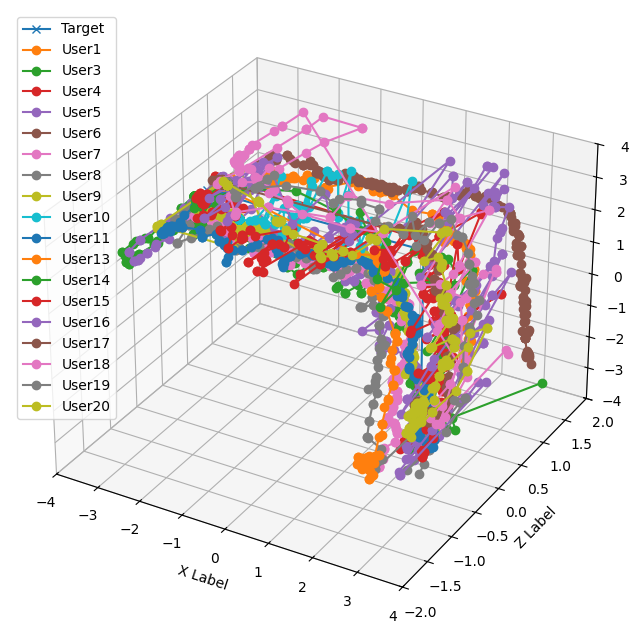

In [909]:
fig = plt.figure(figsize=(20, 8))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(trajectoryCircuit0X, trajectoryCircuit0Y, trajectoryCircuit0Z, label = 'Target', marker = 'x')

for k in range(0, len(nameList)):
    cond = (allCircuits['CircuitID'] == measureCircuit[0]) & (allCircuits['Conditions'] == conditions[0]) & (allCircuits['User'] == nameList[k]) & (allCircuits['PosY'] < 3) & (allCircuits['PosZ'] > -3)  & (allCircuits['PosZ'] < 3) 

    ax.plot(allCircuits[cond]['PosX'], allCircuits[cond]['PosY'], allCircuits[cond]['PosZ'], marker = 'o', label = nameList[k])
    ax.legend()

    # Setting the Axes properties
    ax.set(xlim3d=(-4, 4), xlabel='X')
    ax.set(ylim3d=(-2, 2), ylabel='Z')
    ax.set(zlim3d=(-4, 4), zlabel='Y')
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Z Label')
    ax.set_zlabel('Y Label')


plt.show()

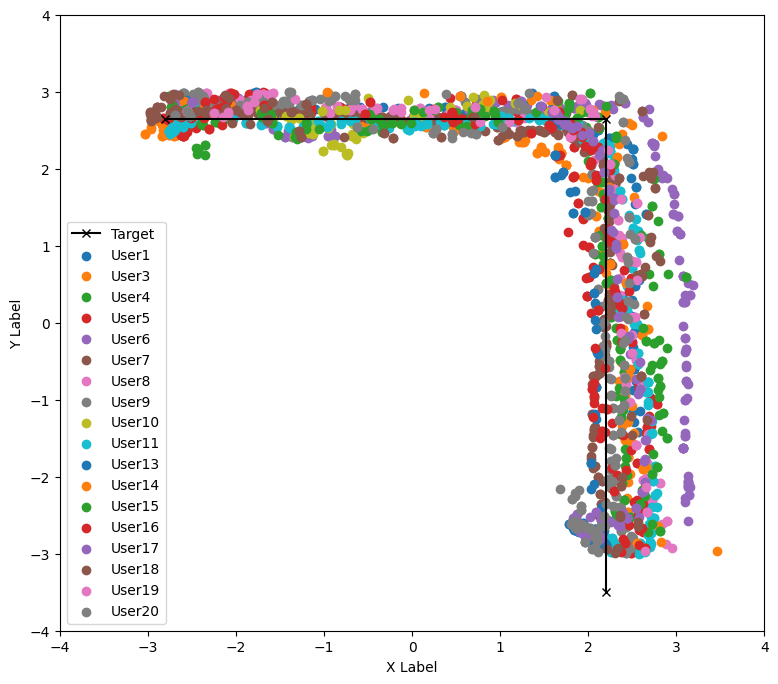

In [1115]:
fig = plt.figure(figsize=(20, 8))

ax = fig.add_subplot(1, 2, 1)
ax.plot(trajectoryCircuit0X, trajectoryCircuit0Z, label = 'Target', marker = 'x', color = 'black')

for k in range(0, len(nameList)):
    cond = (allCircuits['CircuitID'] == measureCircuit[0]) & (allCircuits['Conditions'] == conditions[0]) & (allCircuits['User'] == nameList[k]) & (allCircuits['PosY'] < 3) & (allCircuits['PosZ'] > -3)  & (allCircuits['PosZ'] < 3) 

    ax.scatter(allCircuits[cond]['PosX'], allCircuits[cond]['PosZ'], marker = 'o', label = nameList[k])
    ax.legend()

    # Setting the Axes properties
    ax.set(xlim=(-4, 4), xlabel='X')
    ax.set(ylim=(-4, 4), ylabel='Y')
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')


plt.show()


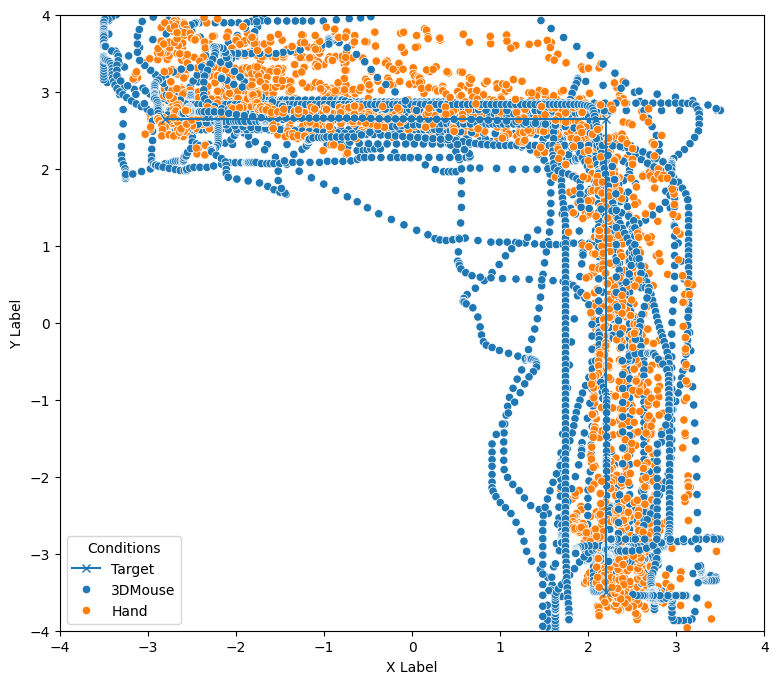

In [911]:
fig = plt.figure(figsize=(20, 8))

ax = fig.add_subplot(1, 2, 1)

cond = (allCircuits['CircuitID'] == measureCircuit[0])

ax = plt.plot(trajectoryCircuit0X, trajectoryCircuit0Z, label = 'Target', marker = 'x')
ax = sns.scatterplot(data = allCircuits[cond], x = 'PosX', y = 'PosZ', hue = 'Conditions')


    # Setting the Axes properties
ax.set(xlim=(-4, 4), xlabel='X')
ax.set(ylim=(-4, 4), ylabel='Y')
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')


plt.show()

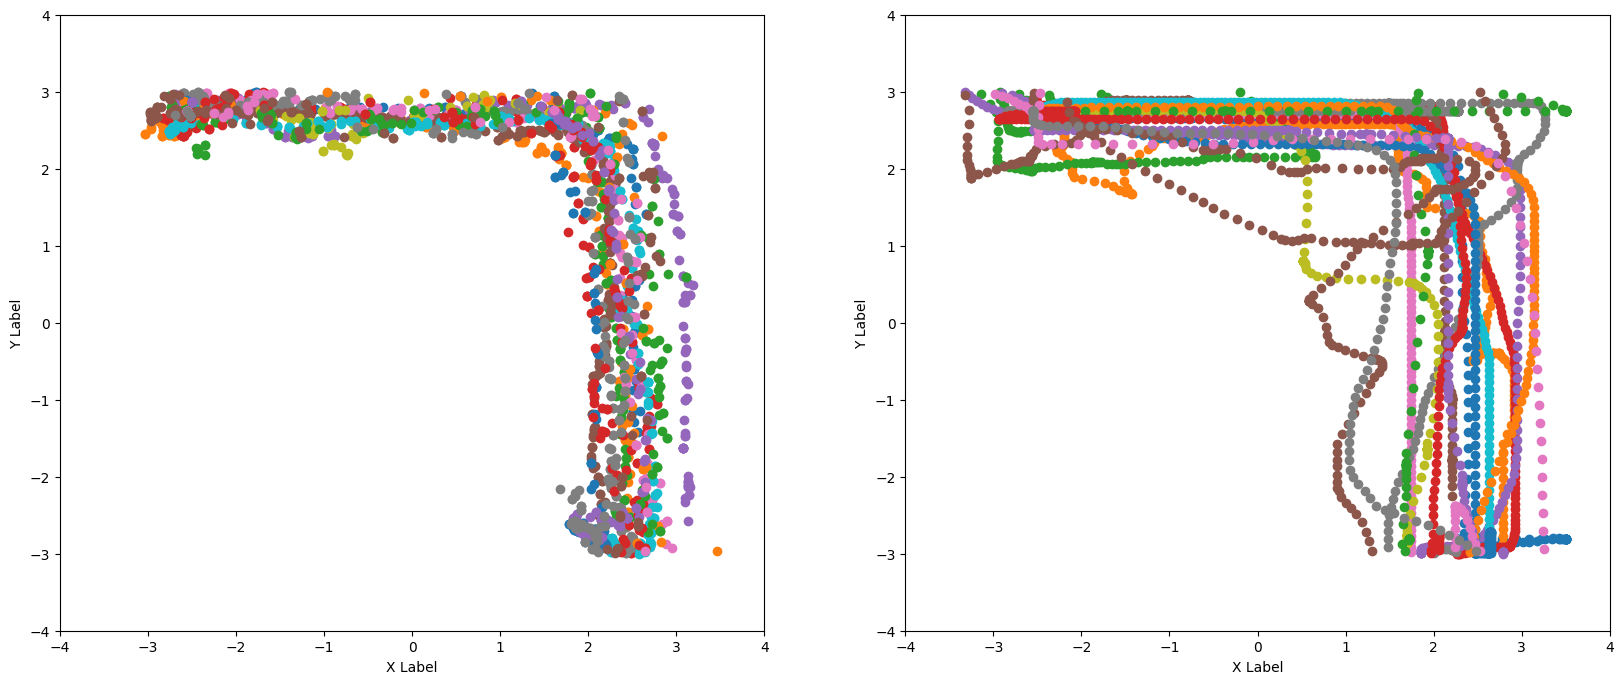

In [1157]:
fig = plt.figure(figsize=(20, 8))

ax = fig.add_subplot(1, 2, 1)

for k in range(0, len(nameList)):
    cond = (allCircuits['CircuitID'] == measureCircuit[0]) & (allCircuits['Conditions'] == conditions[0]) & (allCircuits['User'] == nameList[k]) & (allCircuits['PosY'] < 3) & (allCircuits['PosZ'] > -3)  & (allCircuits['PosZ'] < 3) 

    ax.scatter(allCircuits[cond]['PosX'], allCircuits[cond]['PosZ'], marker = 'o', label = nameList[k])
    #ax.legend()

    # Setting the Axes properties
    ax.set(xlim=(-4, 4), xlabel='X')
    ax.set(ylim=(-4, 4), ylabel='Y')
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')

ax = fig.add_subplot(1, 2, 2)

for k in range(0, len(nameList)):
    cond = (allCircuits['CircuitID'] == measureCircuit[0]) & (allCircuits['Conditions'] == conditions[1]) & (allCircuits['User'] == nameList[k]) & (allCircuits['PosY'] < 3) & (allCircuits['PosZ'] > -3)  & (allCircuits['PosZ'] < 3) 

    ax.scatter(allCircuits[cond]['PosX'], allCircuits[cond]['PosZ'], marker = 'o', label = nameList[k])
    #ax.legend()

    # Setting the Axes properties
    ax.set(xlim=(-4, 4), xlabel='X')
    ax.set(ylim=(-4, 4), ylabel='Y')
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')

plt.savefig('./Circuit0.pdf')

plt.show()

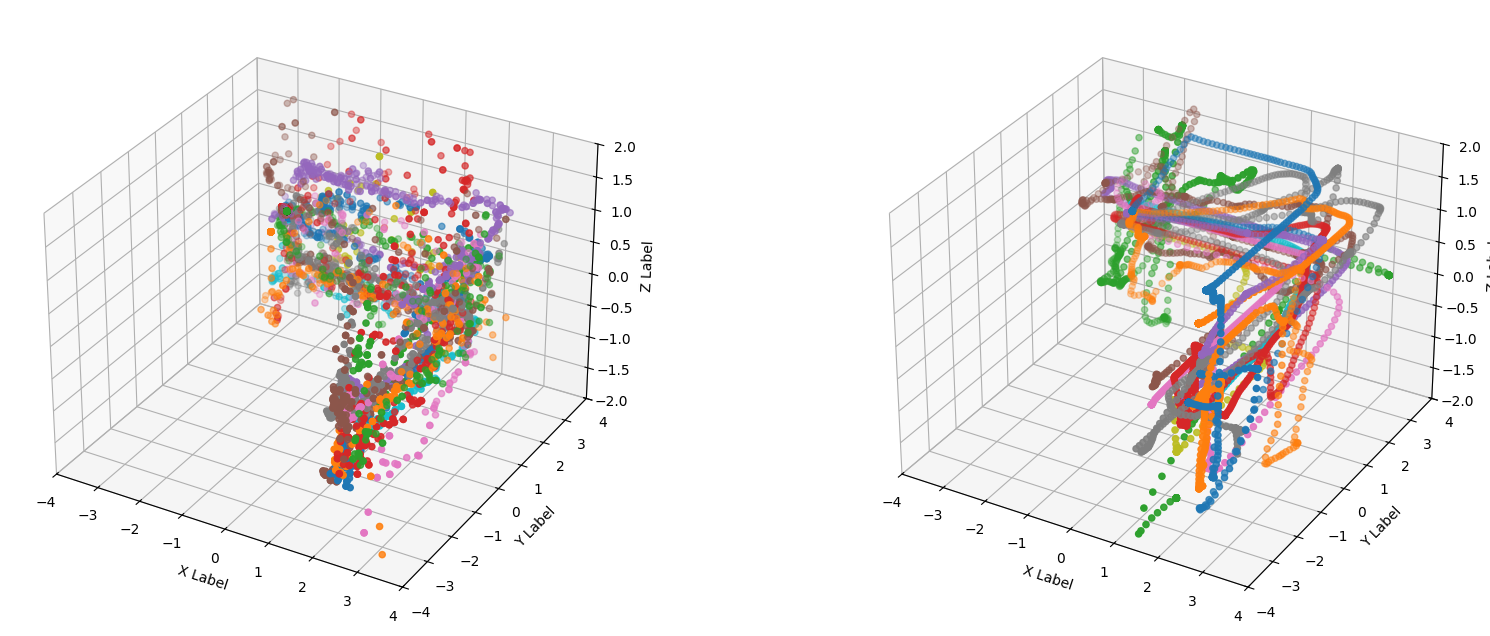

In [1137]:
fig = plt.figure(figsize=(20, 8))
weirdList = ['User12']
#for i in range(0, len(conditions)):
for j in range(0, 1):
    ax = fig.add_subplot(121, projection='3d')

    for k in range(0, len(nameList)):
        cond =  (allCircuits['CircuitID'] == measureCircuit[j]) & (allCircuits['Conditions'] == conditions[0]) & (allCircuits['User'] == nameList[k])
    
        ax.scatter(allCircuits[cond]['PosX'], allCircuits[cond]['PosZ'], allCircuits[cond]['PosY'], label = nameList[k])
    
        # Setting the Axes properties
        ax.set(xlim3d=(-4, 4), xlabel='X')
        ax.set(ylim3d=(-4, 4), ylabel='Y')
        ax.set(zlim3d=(-2, 2), zlabel='Z')
        
        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')

    ax = fig.add_subplot(122, projection='3d')

    for k in range(0, len(nameList)):
        cond =  (allCircuits['CircuitID'] == measureCircuit[j]) & (allCircuits['Conditions'] == conditions[1]) & (allCircuits['User'] == nameList[k]) 

        ax.scatter(allCircuits[cond]['PosX'], allCircuits[cond]['PosZ'], allCircuits[cond]['PosY'], label = nameList[k])
    
        # Setting the Axes properties
        ax.set(xlim3d=(-4, 4), xlabel='X')
        ax.set(ylim3d=(-4, 4), ylabel='Y')
        ax.set(zlim3d=(-2, 2), zlabel='Z')
        
        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')

plt.savefig('./Circuit0-3d.pdf')
plt.show()


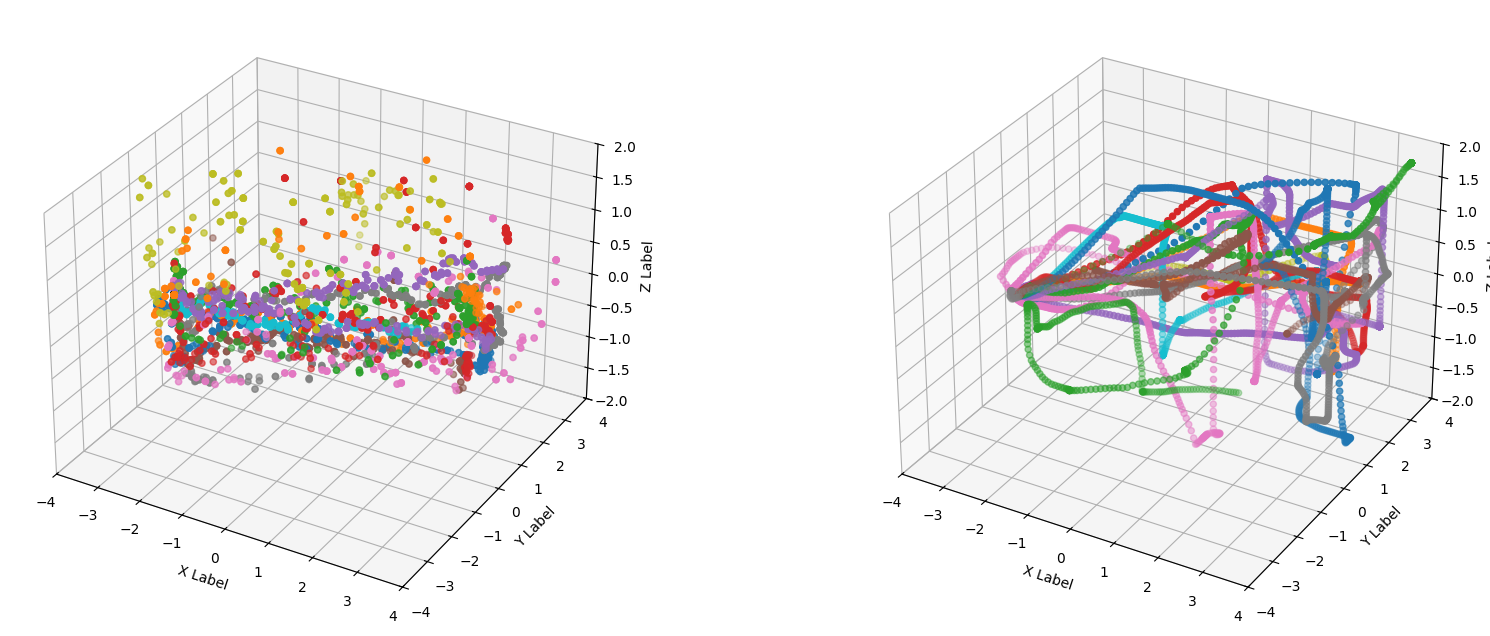

In [1153]:
fig = plt.figure(figsize=(20, 8))

ax = fig.add_subplot(121, projection='3d')
weirdList = ['User10', 'User16', 'User12']

for k in range(0, len(nameList)):
    cond = (allCircuits['CircuitID'] == 'Circuit1') & (allCircuits['Conditions'] == conditions[0]) & (allCircuits['User'] == nameList[k])

    ax.scatter(allCircuits[cond]['PosX'], allCircuits[cond]['PosZ'], allCircuits[cond]['PosY'], label = nameList[k])

    # Setting the Axes properties
    ax.set(xlim3d=(-4, 4), xlabel='X')
    ax.set(ylim3d=(-4, 4), ylabel='Y')
    ax.set(zlim3d=(-2, 2), zlabel='Z')
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

ax = fig.add_subplot(122, projection='3d')

for k in range(0, len(nameList)):
    cond =  (allCircuits['CircuitID'] == 'Circuit1') & (allCircuits['Conditions'] == conditions[1]) & (allCircuits['User'] == nameList[k]) 

    ax.scatter(allCircuits[cond]['PosX'], allCircuits[cond]['PosZ'], allCircuits[cond]['PosY'], label = nameList[k])

    # Setting the Axes properties
    ax.set(xlim3d=(-4, 4), xlabel='X')
    ax.set(ylim3d=(-4, 4), ylabel='Y')
    ax.set(zlim3d=(-2, 2), zlabel='Z')
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

plt.savefig('./Circuit1-3d.pdf')
plt.show()


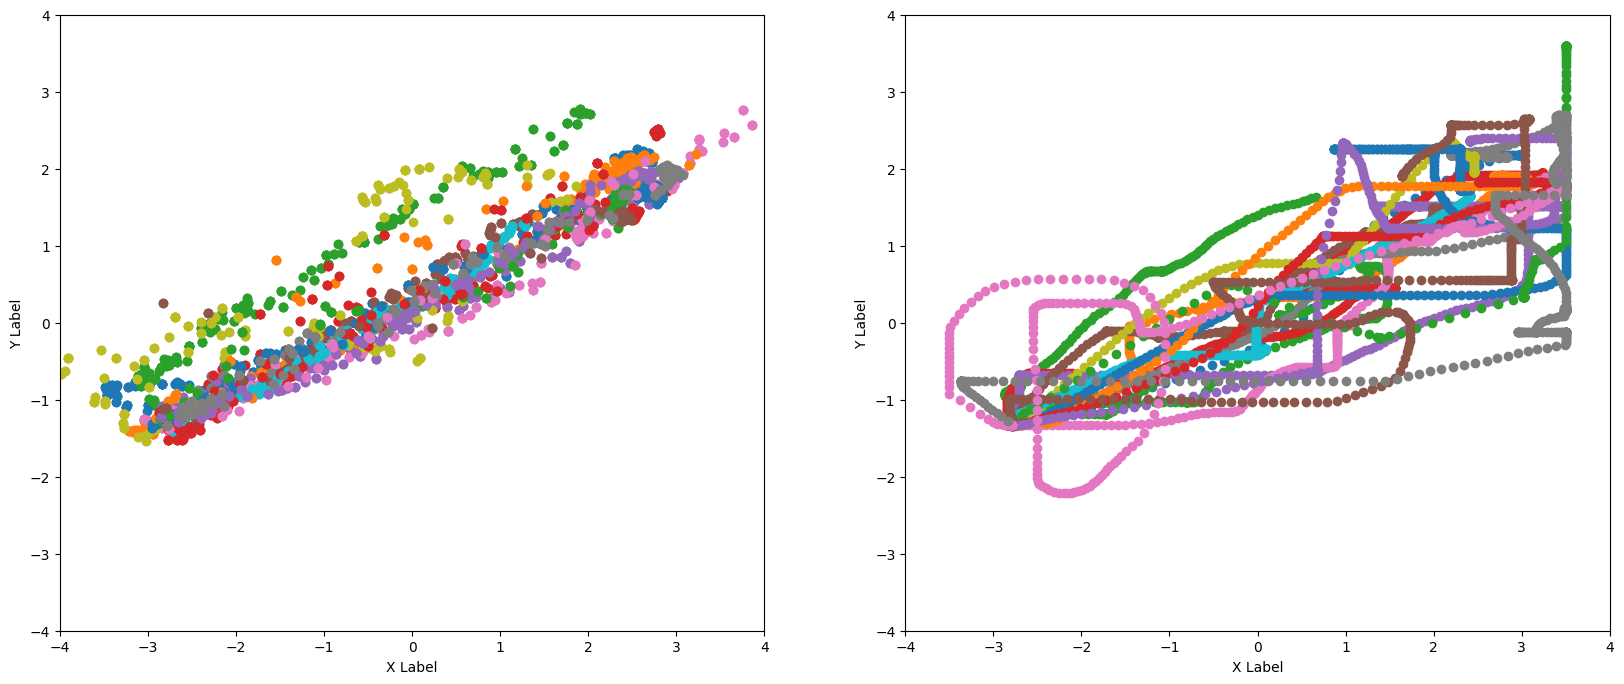

In [1158]:
fig = plt.figure(figsize=(20, 8))

ax = fig.add_subplot(1, 2, 1)

for k in range(0, len(nameList)):
    cond = (allCircuits['CircuitID'] == measureCircuit[1]) & (allCircuits['Conditions'] == conditions[0]) & (allCircuits['User'] == nameList[k]) 

    ax.scatter(allCircuits[cond]['PosX'], allCircuits[cond]['PosZ'], marker = 'o', label = nameList[k])
    #ax.legend()

    # Setting the Axes properties
    ax.set(xlim=(-4, 4), xlabel='X')
    ax.set(ylim=(-4, 4), ylabel='Y')
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')

ax = fig.add_subplot(1, 2, 2)

for k in range(0, len(nameList)):
    cond = (allCircuits['CircuitID'] == measureCircuit[1]) & (allCircuits['Conditions'] == conditions[1]) & (allCircuits['User'] == nameList[k]) 

    ax.scatter(allCircuits[cond]['PosX'], allCircuits[cond]['PosZ'], marker = 'o', label = nameList[k])
    #ax.legend()

    # Setting the Axes properties
    ax.set(xlim=(-4, 4), xlabel='X')
    ax.set(ylim=(-4, 4), ylabel='Y')
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')

plt.savefig('./Circuit1.pdf')
plt.show()

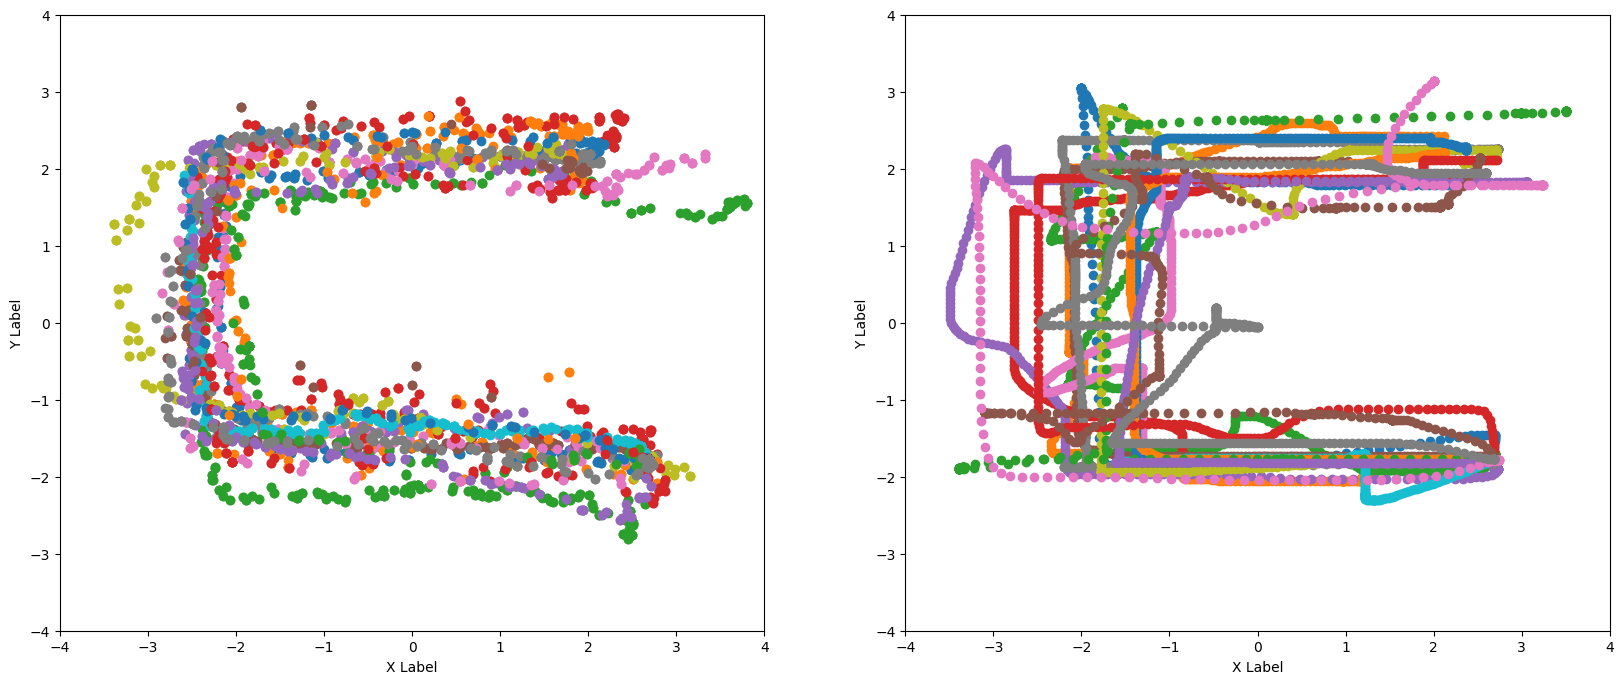

In [1159]:
fig = plt.figure(figsize=(20, 8))

ax = fig.add_subplot(1, 2, 1)

for k in range(0, len(nameList)):
    cond = (allCircuits['CircuitID'] == measureCircuit[2]) & (allCircuits['Conditions'] == conditions[0]) & (allCircuits['User'] == nameList[k]) 

    ax.scatter(allCircuits[cond]['PosX'], allCircuits[cond]['PosZ'], marker = 'o', label = nameList[k])
    #ax.legend()

    # Setting the Axes properties
    ax.set(xlim=(-4, 4), xlabel='X')
    ax.set(ylim=(-4, 4), ylabel='Y')
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')

ax = fig.add_subplot(1, 2, 2)

for k in range(0, len(nameList)):
    cond = (allCircuits['CircuitID'] == measureCircuit[2]) & (allCircuits['Conditions'] == conditions[1]) & (allCircuits['User'] == nameList[k])

    ax.scatter(allCircuits[cond]['PosX'], allCircuits[cond]['PosZ'], marker = 'o', label = nameList[k])
    #ax.legend()

    # Setting the Axes properties
    ax.set(xlim=(-4, 4), xlabel='X')
    ax.set(ylim=(-4, 4), ylabel='Y')
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')

plt.savefig('./Circuit2.pdf')

plt.show()

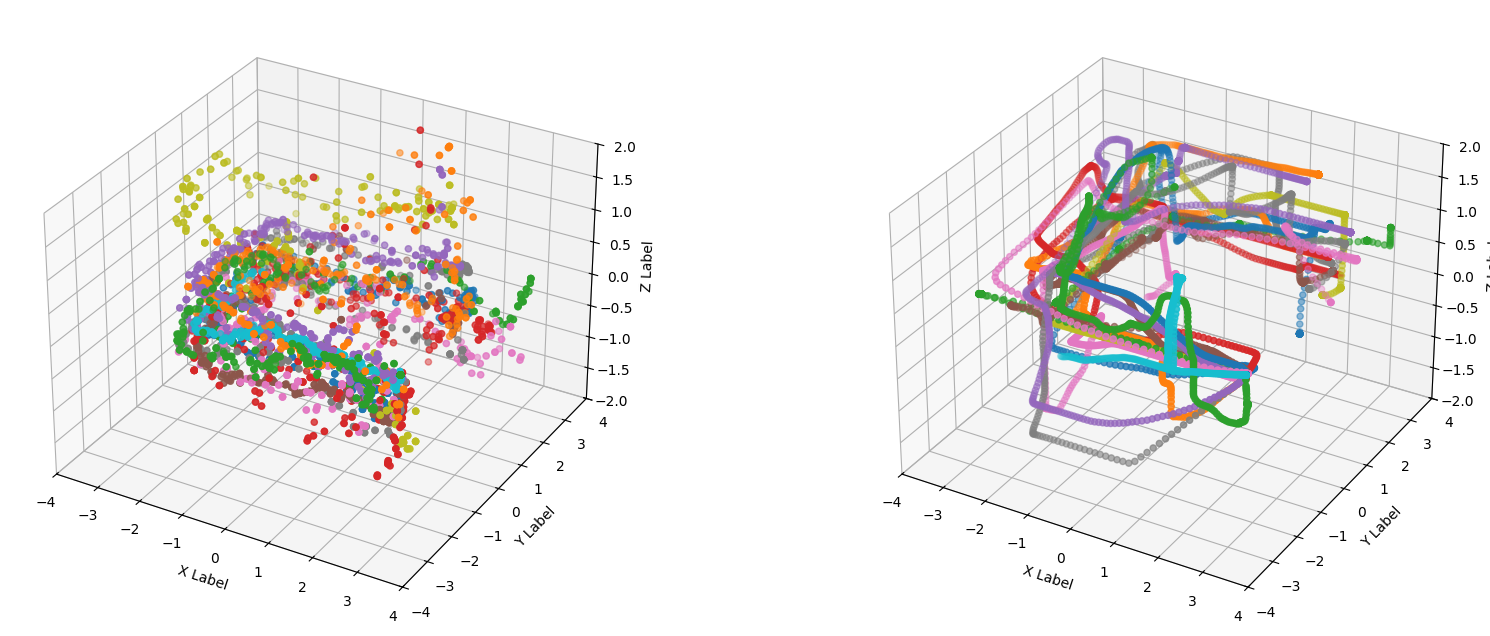

In [1156]:
fig = plt.figure(figsize=(20, 8))

ax = fig.add_subplot(121, projection='3d')

for k in range(0, len(nameList)):
    cond = (allCircuits['CircuitID'] == 'Circuit2') & (allCircuits['Conditions'] == conditions[0]) & (allCircuits['User'] == nameList[k])

    ax.scatter(allCircuits[cond]['PosX'], allCircuits[cond]['PosZ'], allCircuits[cond]['PosY'], label = nameList[k])

    # Setting the Axes properties
    ax.set(xlim3d=(-4, 4), xlabel='X')
    ax.set(ylim3d=(-4, 4), ylabel='Y')
    ax.set(zlim3d=(-2, 2), zlabel='Z')
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

ax = fig.add_subplot(122, projection='3d')

for k in range(0, len(nameList)):
    cond = (allCircuits['CircuitID'] == 'Circuit2') & (allCircuits['Conditions'] == conditions[1]) & (allCircuits['User'] == nameList[k])

    ax.scatter(allCircuits[cond]['PosX'], allCircuits[cond]['PosZ'], allCircuits[cond]['PosY'], label = nameList[k])

    # Setting the Axes properties
    ax.set(xlim3d=(-4, 4), xlabel='X')
    ax.set(ylim3d=(-4, 4), ylabel='Y')
    ax.set(zlim3d=(-2, 2), zlabel='Z')
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

plt.savefig('./Circuit2-3d.pdf')

plt.show()


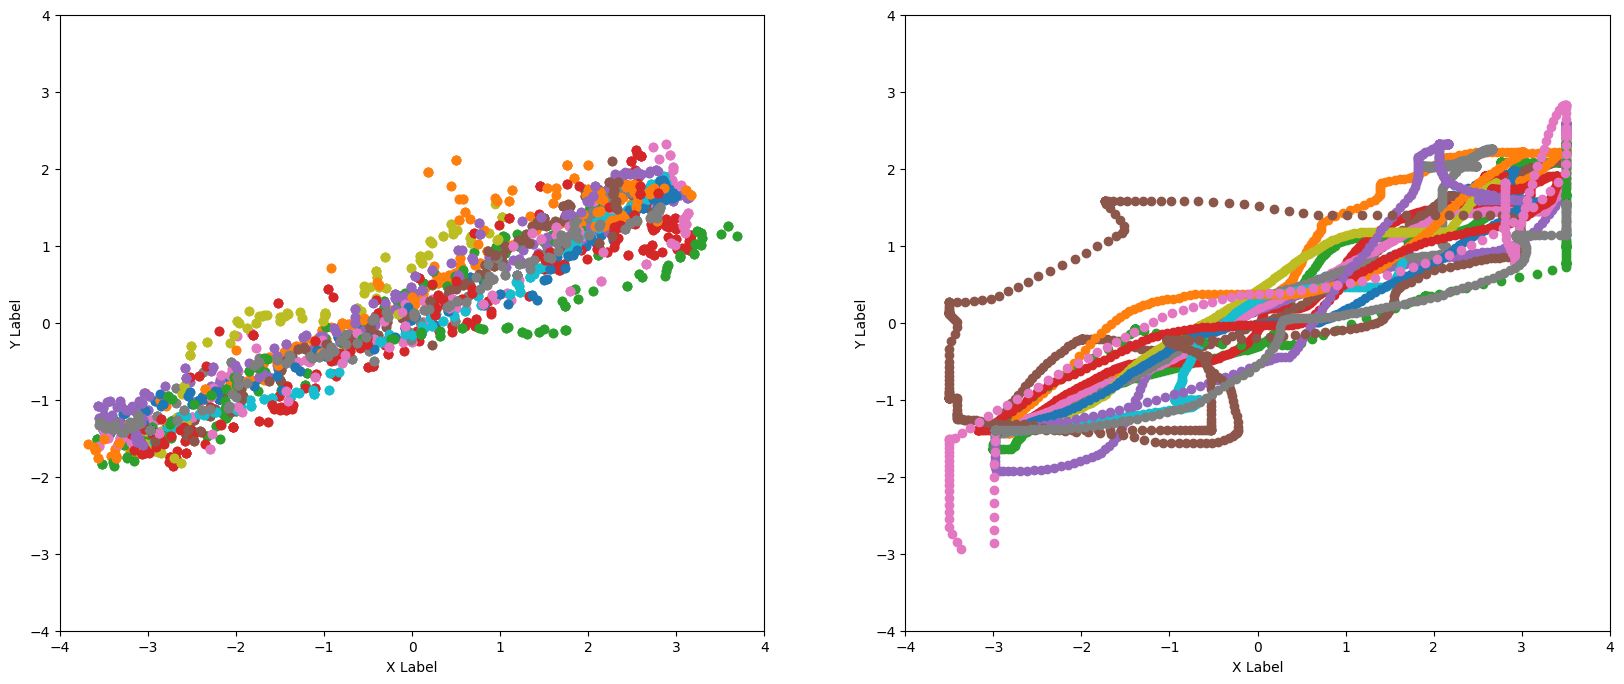

In [1160]:
fig = plt.figure(figsize=(20, 8))

ax = fig.add_subplot(1, 2, 1)

for k in range(0, len(nameList)):
    cond = (allCircuits['CircuitID'] == measureCircuit[3]) & (allCircuits['Conditions'] == conditions[0]) & (allCircuits['User'] == nameList[k]) & (allCircuits['PosY'] < 3) & (allCircuits['PosZ'] > -3)  & (allCircuits['PosZ'] < 3) 

    ax.scatter(allCircuits[cond]['PosX'], allCircuits[cond]['PosZ'], marker = 'o', label = nameList[k])
    #ax.legend()

    # Setting the Axes properties
    ax.set(xlim=(-4, 4), xlabel='X')
    ax.set(ylim=(-4, 4), ylabel='Y')
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')

ax = fig.add_subplot(1, 2, 2)

for k in range(0, len(nameList)):
    cond = (allCircuits['CircuitID'] == measureCircuit[3]) & (allCircuits['Conditions'] == conditions[1]) & (allCircuits['User'] == nameList[k]) & (allCircuits['PosY'] < 3) & (allCircuits['PosZ'] > -3)  & (allCircuits['PosZ'] < 3) 

    ax.scatter(allCircuits[cond]['PosX'], allCircuits[cond]['PosZ'], marker = 'o', label = nameList[k])
    #ax.legend()

    # Setting the Axes properties
    ax.set(xlim=(-4, 4), xlabel='X')
    ax.set(ylim=(-4, 4), ylabel='Y')
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')

plt.savefig('./Circuit3.pdf')

plt.show()

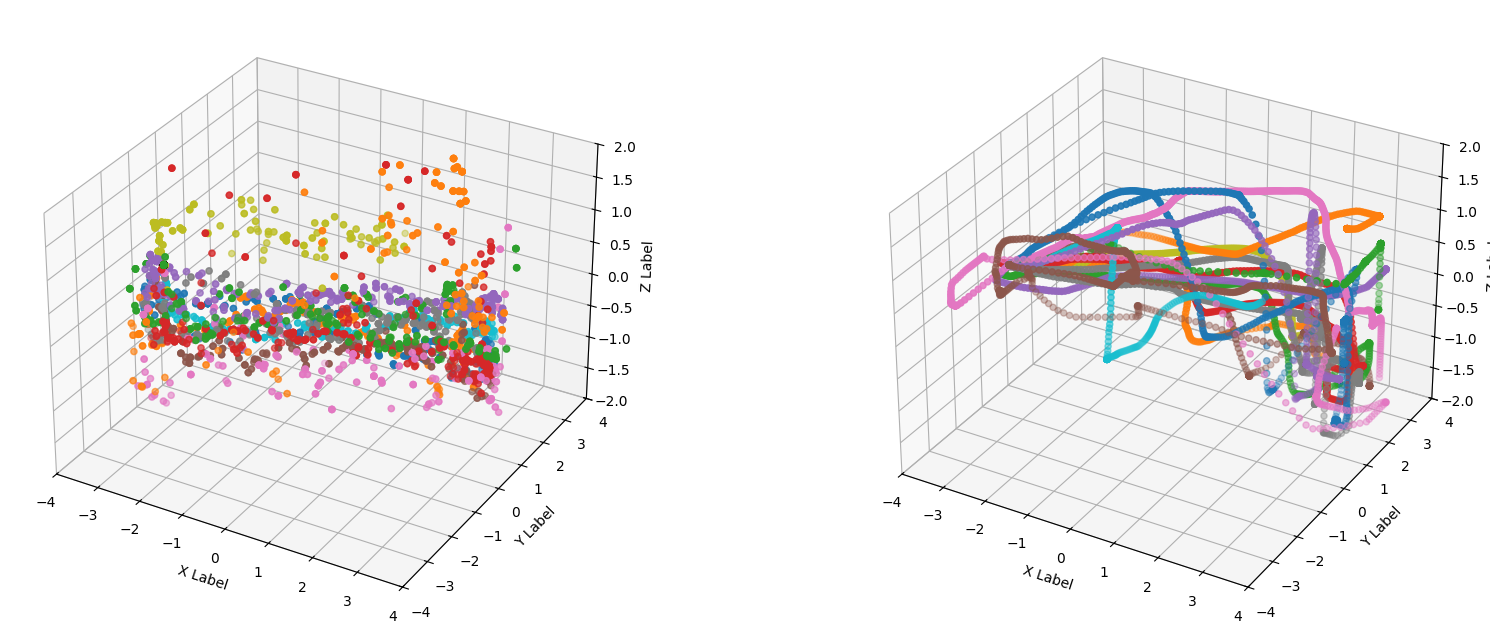

In [1152]:
fig = plt.figure(figsize=(20, 8))

ax = fig.add_subplot(121, projection='3d')

for k in range(0, len(nameList)):
    cond = (allCircuits['CircuitID'] == 'Circuit3') & (allCircuits['Conditions'] == conditions[0]) & (allCircuits['User'] == nameList[k])

    ax.scatter(allCircuits[cond]['PosX'], allCircuits[cond]['PosZ'], allCircuits[cond]['PosY'], label = nameList[k])

    # Setting the Axes properties
    ax.set(xlim3d=(-4, 4), xlabel='X')
    ax.set(ylim3d=(-4, 4), ylabel='Y')
    ax.set(zlim3d=(-2, 2), zlabel='Z')
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

ax = fig.add_subplot(122, projection='3d')

for k in range(0, len(nameList)):
    cond = (allCircuits['CircuitID'] == 'Circuit3') & (allCircuits['Conditions'] == conditions[1]) & (allCircuits['User'] == nameList[k]) 

    ax.scatter(allCircuits[cond]['PosX'], allCircuits[cond]['PosZ'], allCircuits[cond]['PosY'], label = nameList[k])

    # Setting the Axes properties
    ax.set(xlim3d=(-4, 4), xlabel='X')
    ax.set(ylim3d=(-4, 4), ylabel='Y')
    ax.set(zlim3d=(-2, 2), zlabel='Z')
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

plt.savefig('./Circuit3-3d.pdf')
plt.show()


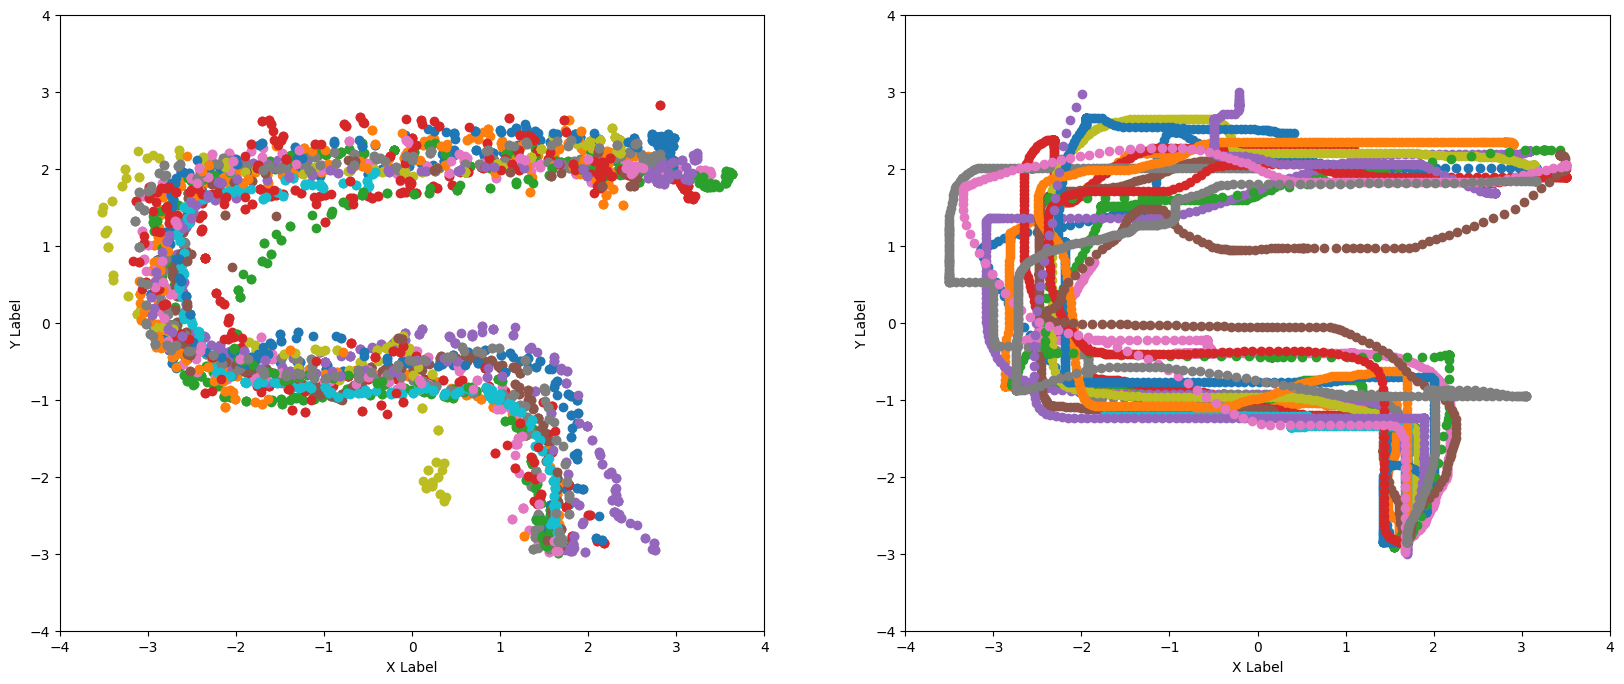

In [1161]:
fig = plt.figure(figsize=(20, 8))

ax = fig.add_subplot(1, 2, 1)

for k in range(0, len(nameList)):
    cond = (allCircuits['CircuitID'] == measureCircuit[4]) & (allCircuits['Conditions'] == conditions[0]) & (allCircuits['User'] == nameList[k]) & (allCircuits['PosY'] < 3) & (allCircuits['PosZ'] > -3)  & (allCircuits['PosZ'] < 3) 

    ax.scatter(allCircuits[cond]['PosX'], allCircuits[cond]['PosZ'], marker = 'o', label = nameList[k])
    #ax.legend()

    # Setting the Axes properties
    ax.set(xlim=(-4, 4), xlabel='X')
    ax.set(ylim=(-4, 4), ylabel='Y')
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')

ax = fig.add_subplot(1, 2, 2)

for k in range(0, len(nameList)):
    cond = (allCircuits['CircuitID'] == measureCircuit[4]) & (allCircuits['Conditions'] == conditions[1]) & (allCircuits['User'] == nameList[k]) & (allCircuits['PosY'] < 3) & (allCircuits['PosZ'] > -3)  & (allCircuits['PosZ'] < 3) 

    ax.scatter(allCircuits[cond]['PosX'], allCircuits[cond]['PosZ'], marker = 'o', label = nameList[k])
    #ax.legend()

    # Setting the Axes properties
    ax.set(xlim=(-4, 4), xlabel='X')
    ax.set(ylim=(-4, 4), ylabel='Y')
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')

plt.savefig('./Circuit4.pdf')

plt.show()

In [1150]:
fig = plt.figure(figsize=(20, 8))

ax = fig.add_subplot(121, projection='3d')

for k in range(0, len(nameList)):
    cond = (allCircuits['CircuitID'] == 'Circuit4') & (allCircuits['Conditions'] == conditions[0]) & (allCircuits['User'] == nameList[k])

    ax.scatter(allCircuits[cond]['PosX'], allCircuits[cond]['PosZ'], allCircuits[cond]['PosY'], label = nameList[k])

    # Setting the Axes properties
    ax.set(xlim3d=(-4, 4), xlabel='X')
    ax.set(ylim3d=(-4, 4), ylabel='Y')
    ax.set(zlim3d=(-2, 2), zlabel='Z')
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

ax = fig.add_subplot(122, projection='3d')

for k in range(0, len(nameList)):
    cond = (allCircuits['CircuitID'] == 'Circuit4') & (allCircuits['Conditions'] == conditions[1]) & (allCircuits['User'] == nameList[k]) 

    ax.scatter(allCircuits[cond]['PosX'], allCircuits[cond]['PosZ'], allCircuits[cond]['PosY'], label = nameList[k])

    # Setting the Axes properties
    ax.set(xlim3d=(-4, 4), xlabel='X')
    ax.set(ylim3d=(-4, 4), ylabel='Y')
    ax.set(zlim3d=(-2, 2), zlabel='Z')
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

plt.savefig('./Circuit4-3d.pdf')
plt.show()

## Remove the shitty conditiosn for AccDistance

In [601]:
pg.rm_anova(data = allCountdowns[allCountdowns['UX'] == 'PathTracing'], 
            dv = 'AccDistance', within = ['Conditions'], subject = 'User', correction = 'auto', detailed = True, effsize = 'n2')


Source        SS  DF        MS          F     p-unc        n2  eps
0  Conditions  3.280847   1  3.280847  14.154034  0.001703  0.366658  1.0
1       Error  3.708734  16  0.231796        NaN       NaN       NaN  NaN

In [602]:

allCountdowns[(allCountdowns['UX'] == 'PathTracing') & (allCountdowns['Conditions'] == 'Hand')]['AccDistance'].describe()

count    70.000000
mean      2.059195
std       0.602914
min       1.019985
25%       1.631523
50%       2.056839
75%       2.484353
max       3.384289
Name: AccDistance, dtype: float64

In [603]:
allCountdowns[(allCountdowns['UX'] == 'PathTracing') & (allCountdowns['Conditions'] == '3DMouse')]['AccDistance'].describe()


count    86.000000
mean      1.550461
std       0.507169
min       0.721101
25%       1.121637
50%       1.525080
75%       1.837112
max       3.240855
Name: AccDistance, dtype: float64

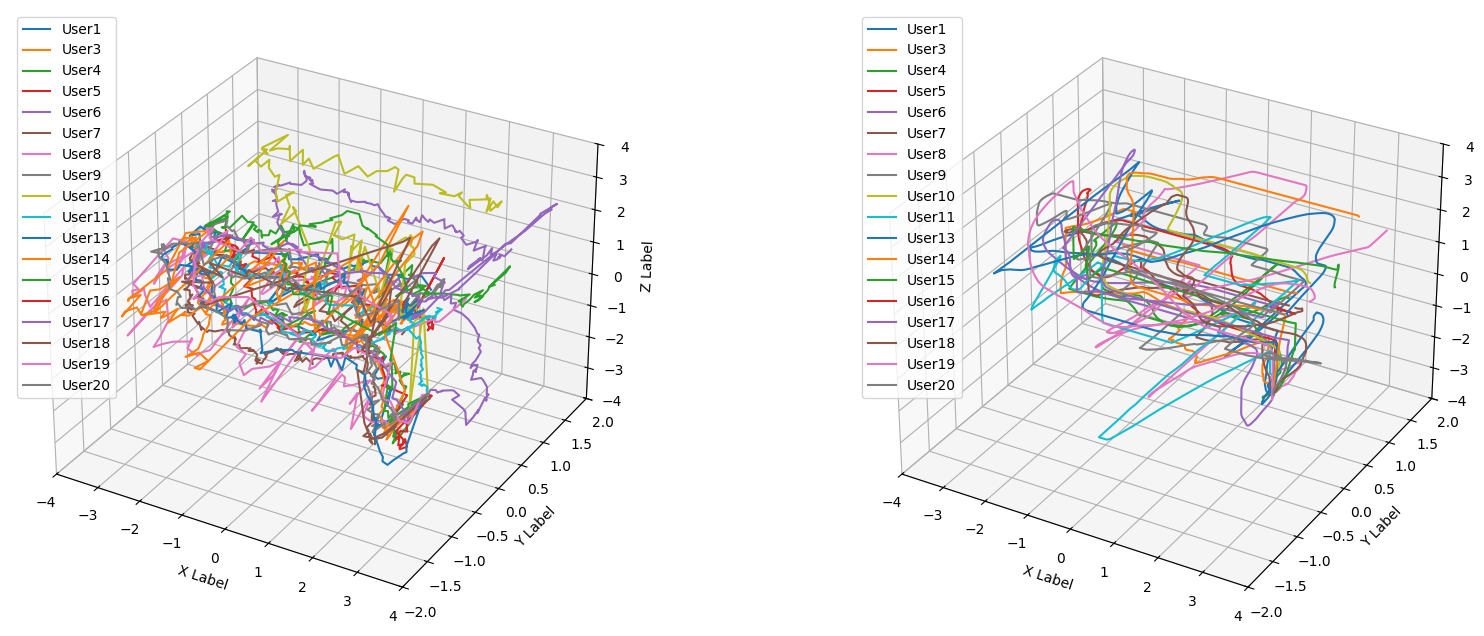

In [604]:
fig = plt.figure(figsize=(20, 8))

ax = fig.add_subplot(121, projection='3d')

for k in range(0, len(nameList)):
    cond =  (allCircuits['User'] != 'User16') & (allCircuits['User'] != 'User12') & (allCircuits['CircuitID'] == 'Circuit4') & (allCircuits['Conditions'] == conditions[0]) & (allCircuits['User'] == nameList[k]) 

    ax.plot(allCircuits[cond]['PosX'], allCircuits[cond]['PosY'], allCircuits[cond]['PosZ'], label = nameList[k])
    ax.legend()

    # Setting the Axes properties
    ax.set(xlim3d=(-4, 4), xlabel='X')
    ax.set(ylim3d=(-2, 2), ylabel='Y')
    ax.set(zlim3d=(-4, 4), zlabel='Z')
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

ax = fig.add_subplot(122, projection='3d')

for k in range(0, len(nameList)):
    cond =  (allCircuits['User'] != 'User16') & (allCircuits['User'] != 'User12') & (allCircuits['CircuitID'] == 'Circuit4') & (allCircuits['Conditions'] == conditions[1]) & (allCircuits['User'] == nameList[k]) 
    ax.plot(allCircuits[cond]['PosX'], allCircuits[cond]['PosY'], allCircuits[cond]['PosZ'], label = nameList[k])
    ax.legend()

    # Setting the Axes properties
    ax.set(xlim3d=(-4, 4), xlabel='X')
    ax.set(ylim3d=(-2, 2), ylabel='Y')
    ax.set(zlim3d=(-4, 4), zlabel='Z')
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
plt.show()


In [605]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')

for i in range(0, 2):
    cond = (allCircuits['CircuitID'] == measureCircuit[0]) & (allCircuits['Conditions'] == conditions[i]) & (allCircuits['User'] == nameList[0]) & (allCircuits['PosY'] < 3) & (allCircuits['PosZ'] > -3)  & (allCircuits['PosZ'] < 3)  & (allCircuits['User'] != 'User2')  & (allCircuits['User'] != 'User12') & (allCircuits['User'] != 'User18') 

    ax.plot(allCircuits[cond]['PosX'], allCircuits[cond]['PosY'], allCircuits[cond]['PosZ'], marker = 'o', label = conditions[i])
    ax.legend()

# Setting the Axes properties
ax.set(xlim3d=(-4, 4), xlabel='X')
ax.set(ylim3d=(-2, 2), ylabel='Y')
ax.set(zlim3d=(-4, 4), zlabel='Z')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

Text(0.5, 0, 'Z Label')

Text(0.5, 0, 'Z Label')

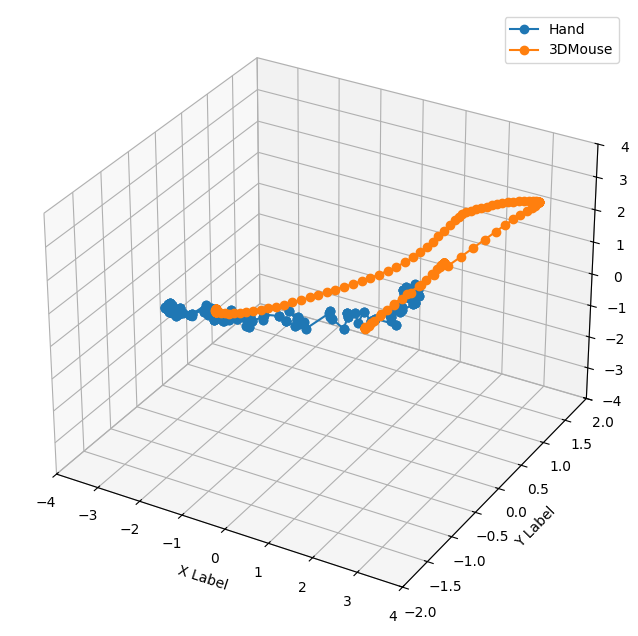

In [606]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')

for i in range(0, 2):
    cond = (allCircuits['CircuitID'] == measureCircuit[1]) & (allCircuits['Conditions'] == conditions[i]) & (allCircuits['User'] == nameList[0]) & (allCircuits['PosY'] < 3) & (allCircuits['PosZ'] > -3)  & (allCircuits['PosZ'] < 3)  & (allCircuits['User'] != 'User2')  & (allCircuits['User'] != 'User12') & (allCircuits['User'] != 'User18') 

    ax.plot(allCircuits[cond]['PosX'], allCircuits[cond]['PosY'], allCircuits[cond]['PosZ'], marker = 'o', label = conditions[i])
    ax.legend()

# Setting the Axes properties
ax.set(xlim3d=(-4, 4), xlabel='X')
ax.set(ylim3d=(-2, 2), ylabel='Y')
ax.set(zlim3d=(-4, 4), zlabel='Z')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [607]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')

for k in range(0, 6):
    for i in range(0, 2):
        cond = (allCircuits['CircuitID'] == measureCircuit[2]) & (allCircuits['Conditions'] == conditions[i]) & (allCircuits['User'] == nameList[k])  
    
        ax.plot(allCircuits[cond]['PosX'], allCircuits[cond]['PosY'], allCircuits[cond]['PosZ'], marker = 'o', label = conditions[i]+','+nameList[k])
        ax.legend()


# Setting the Axes properties
ax.set(xlim3d=(-4, 4), xlabel='X')
ax.set(ylim3d=(-2, 2), ylabel='Y')
ax.set(zlim3d=(-4, 4), zlabel='Z')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

Text(0.5, 0, 'Z Label')

In [608]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')

for i in range(0, 2):
    cond = (allCircuits['CircuitID'] == measureCircuit[3]) & (allCircuits['Conditions'] == conditions[i]) & (allCircuits['User'] == nameList[0]) & (allCircuits['PosY'] < 3) & (allCircuits['PosZ'] > -3)  & (allCircuits['PosZ'] < 3)  & (allCircuits['User'] != 'User2')  & (allCircuits['User'] != 'User12') & (allCircuits['User'] != 'User18') 

    ax.plot(allCircuits[cond]['PosX'], allCircuits[cond]['PosY'], allCircuits[cond]['PosZ'], marker = 'o', label = conditions[i])
    ax.legend()

# Setting the Axes properties
ax.set(xlim3d=(-4, 4), xlabel='X')
ax.set(ylim3d=(-2, 2), ylabel='Y')
ax.set(zlim3d=(-4, 4), zlabel='Z')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

Text(0.5, 0, 'Z Label')

In [609]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')

for i in range(0, 2):
    cond = (allCircuits['CircuitID'] == measureCircuit[4]) & (allCircuits['Conditions'] == conditions[i]) & (allCircuits['User'] == nameList[0]) & (allCircuits['PosY'] < 3) & (allCircuits['PosZ'] > -3)  & (allCircuits['PosZ'] < 3)  & (allCircuits['User'] != 'User2')  & (allCircuits['User'] != 'User12') & (allCircuits['User'] != 'User18') 

    ax.plot(allCircuits[cond]['PosX'], allCircuits[cond]['PosY'], allCircuits[cond]['PosZ'], marker = 'o', label = conditions[i])
    ax.legend()

# Setting the Axes properties
ax.set(xlim3d=(-4, 4), xlabel='X')
ax.set(ylim3d=(-2, 2), ylabel='Y')
ax.set(zlim3d=(-4, 4), zlabel='Z')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

Text(0.5, 0, 'Z Label')

In [610]:
fig = plt.figure(figsize=(20, 8))
k = (k + 1) % len(measureCircuit)
for j in range(0, len(conditions)):
    ax = fig.add_subplot(1, len(conditions), j+1, projection='3d')

    for i in range(0, len(nameList)):
        cond = (allCircuits['CircuitID'] == measureCircuit[k]) & (allCircuits['Conditions'] == conditions[j]) & (allCircuits['User'] == nameList[i])  & (allCircuits['User'] != 'User18') 
    
        ax.plot(allCircuits[cond]['PosX'], allCircuits[cond]['PosY'], allCircuits[cond]['PosZ'], marker = 'o', label = nameList[i])
        ax.legend()
    
    # Setting the Axes properties
    ax.set(xlim3d=(-4, 4), xlabel='X')
    ax.set(ylim3d=(-2, 2), ylabel='Y')
    ax.set(zlim3d=(-4, 4), zlabel='Z')
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')


Text(0.5, 0, 'Z Label')

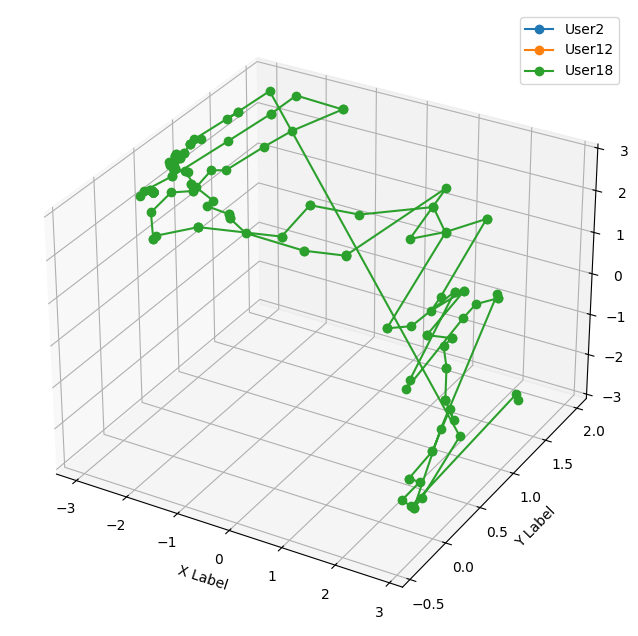

In [611]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

listWeird = ['User2', 'User12', 'User18']
for i in range(0, len(listWeird)):
    cond = (allCircuits['CircuitID'] == 'Circuit0') & (allCircuits['Conditions'] == 'Hand') & (allCircuits['User'] == listWeird[i]) & (allCircuits['PosY'] < 3) & (allCircuits['PosZ'] > -3)  & (allCircuits['PosZ'] < 3) 

    ax.plot(allCircuits[cond]['PosX'], allCircuits[cond]['PosY'], allCircuits[cond]['PosZ'], marker = 'o', label = listWeird[i])
    ax.legend()

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [612]:
nasatlx = pd.DataFrame()
nasatlx = pd.read_csv('./UserData/NasaTLX.csv', sep = ';', decimal = '.')
nasatlx['Total'] = nasatlx['Performance'] + nasatlx['Effort'] + nasatlx['Temporal Demand'] + nasatlx['Physical Demand'] + nasatlx['Mental Demand']

del nasatlx['Unnamed: 8']

In [613]:
nasatlx.columns
headerNasa = ['Mental Demand', 'Physical Demand',
       'Temporal Demand', 'Effort', 'Performance', 'Frustration', 'Total']


In [664]:
nasaSummary = pd.DataFrame()

for i in range(0, len(headerNasa)):
    for j in range(0, len(conditions)):
        nasaSummary.loc[headerNasa[i], conditions[j]] = nasatlx[nasatlx['Condition'] == conditions[j]][headerNasa[i]].mean()

nasaSummary

Hand  3DMouse
Mental Demand     5.80     9.15
Physical Demand   4.50     3.85
Temporal Demand   4.75     7.55
Effort            6.70     9.20
Performance       5.55     7.80
Frustration       3.75     5.85
Total            27.30    37.55

In [666]:
nasaError = pd.DataFrame()

for i in range(0, len(headerNasa)):
    for j in range(0, len(conditions)):
        nasaError.loc[headerNasa[i], conditions[j]] = nasatlx[nasatlx['Condition'] == conditions[j]][headerNasa[i]].std()/math.sqrt(18)

nasaError

Hand   3DMouse
Mental Demand    0.984084  1.079514
Physical Demand  0.893446  0.773369
Temporal Demand  0.844227  1.096179
Effort           1.263755  1.229748
Performance      1.347458  1.292353
Frustration      1.056517  0.986087
Total            3.428552  3.829308

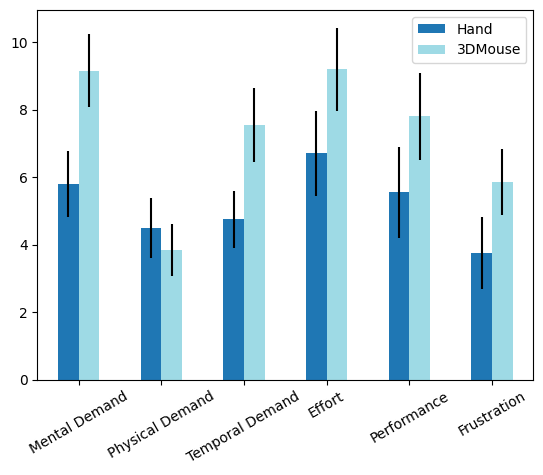

In [671]:
nasaSummary[:-1].plot(kind = 'bar', colormap = 'tab20', rot = 30, yerr = nasaError[:-1], linewidth = 1)
plt.savefig('./NasaTLX.pdf')
plt.show()

In [617]:
nasatlx[nasatlx['Condition'] == '3DMouse'].describe()

Mental Demand  Physical Demand  Temporal Demand    Effort  Performance  \
count      20.000000        20.000000        20.000000  20.00000    20.000000   
mean        9.150000         3.850000         7.550000   9.20000     7.800000   
std         4.579991         3.281126         4.650693   5.21738     5.482988   
min         2.000000         1.000000         1.000000   2.00000     1.000000   
25%         6.000000         1.750000         3.750000   5.75000     3.000000   
50%         8.000000         3.000000         8.000000   8.50000     6.000000   
75%        12.000000         4.250000        11.000000  12.25000    12.500000   
max        18.000000        13.000000        16.000000  18.00000    17.000000   

       Frustration      Total  
count    20.000000  20.000000  
mean      5.850000  37.550000  
std       4.183615  16.246376  
min       1.000000  11.000000  
25%       2.000000  21.000000  
50%       5.000000  41.500000  
75%       8.000000  47.750000  
max      14.000000  62.000000

/var/folders/xd/qgqqknts7d16j8g06t07y4yw0000gn/T/ipykernel_21757/3105370807.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data = nasatlx, x = 'Condition', y = 'Total', showmeans = True, palette = 'tab20')


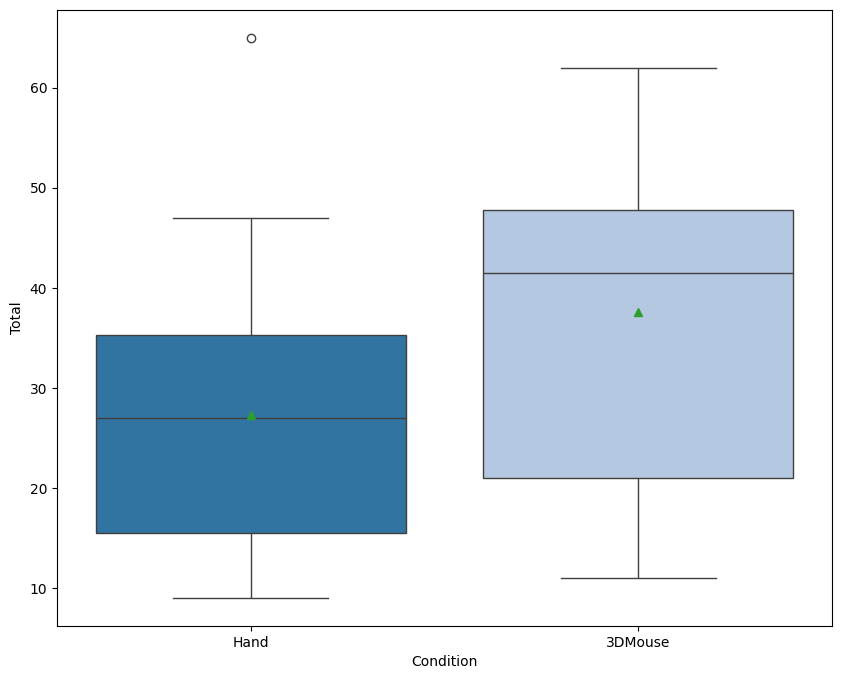

In [676]:
f,ax = plt.subplots(1,1, figsize=(10, 8))

ax = sns.boxplot(data = nasatlx, x = 'Condition', y = 'Total', showmeans = True, palette = 'tab20')

f.savefig('./NasaTLX-total.pdf')


In [619]:
for i in range(0, len(headerNasa)):
    print(headerNasa[i])
    print(pg.rm_anova(data = nasatlx, dv = headerNasa[i], within = ['Condition'], subject = 'User', correction = 'auto', detailed = True, effsize = 'n2'))


Mental Demand
      Source       SS  DF          MS         F     p-unc        n2  eps
0  Condition  112.225   1  112.225000  7.690109  0.012112  0.133288  1.0
1      Error  277.275  19   14.593421       NaN       NaN       NaN  NaN
Physical Demand
      Source       SS  DF        MS         F     p-unc       n2  eps
0  Condition    4.225   1  4.225000  0.442835  0.513755  0.00877  1.0
1      Error  181.275  19  9.540789       NaN       NaN      NaN  NaN
Temporal Demand
      Source     SS  DF         MS         F     p-unc        n2  eps
0  Condition   78.4   1  78.400000  9.105134  0.007082  0.106943  1.0
1      Error  163.6  19   8.610526       NaN       NaN       NaN  NaN
Effort
      Source     SS  DF         MS         F    p-unc        n2  eps
0  Condition   62.5   1  62.500000  3.312413  0.08455  0.055511  1.0
1      Error  358.5  19  18.868421       NaN      NaN       NaN  NaN
Performance
      Source       SS  DF         MS         F    p-unc        n2  eps
0  Condition   50.

In [620]:
for i in range(0, len(headerNasa)):
    print(headerNasa[i])
    print(sm.stats.multicomp.pairwise_tukeyhsd(nasatlx[headerNasa[i]], groups = nasatlx['Condition'], alpha=0.05))


Mental Demand
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------
3DMouse   Hand    -3.35 0.0205 -6.1554 -0.5446   True
-----------------------------------------------------
Physical Demand
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj   lower  upper  reject
----------------------------------------------------
3DMouse   Hand     0.65 0.5655 -1.6194 2.9194  False
----------------------------------------------------
Temporal Demand
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------
3DMouse   Hand     -2.8 0.0394 -5.4572 -0.1428   True
-----------------------------------------------------
Effort
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj   lower  upper  reject
------------------------------------

Mental Demand
Physical Demand
Temporal Demand
Effort
Performance
Frustration
Total


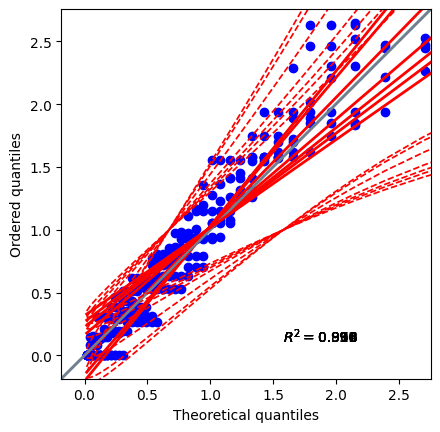

In [621]:
for i in range(0, len(headerNasa)):
    print(headerNasa[i])
    ax = pg.qqplot(nasatlx[headerNasa[i]], dist='expon')